In [89]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sklearn


In [90]:
#Original Model Outputs (64x64) small dataset
#labels_targets = torch.load('test_labels_targets.pt', weights_only = False) ## True events + class
#outputs_class = torch.load('test_outputs_class.pt', weights_only = False)  ## Reconstructed class
#outputs_targets = torch.load('test_outputs_targets.pt', weights_only = False) ## Reconstructed events

#Original Model Outputs (128x128) Large dataset
#labels_targets = torch.load('o128test_labels_targets_medium.pt', weights_only = False) ## True events + class
#outputs_class = torch.load('o128test_outputs_class_medium.pt', weights_only = False)  ## Reconstructed class
#outputs_targets = torch.load('o128test_outputs_targets_medium.pt', weights_only = False) ## Reconstructed events

#Separated Model Outputs
#labels_targets = torch.load('sspatial128test_labels_targets_medium.pt', weights_only = False)
#outputs_class = torch.load('sspatial128test_outputs_class_medium.pt', weights_only = False)
#outputs_targets = torch.load('sspatial128test_outputs_targets_medium.pt', weights_only = False)

#Big model Outputs
labels_targets = torch.load('l128test_labels_targets_medium.pt', weights_only = False)
outputs_class = torch.load('l128test_outputs_class_medium.pt', weights_only = False)
outputs_targets = torch.load('l128test_outputs_targets_medium.pt', weights_only = False)


In [91]:
#Small Files
#mean_scale = torch.load('hyperk_img/mean_scale.pt', weights_only = False)

#Large Files
mean_scale = torch.load('/home/mlproject2024/ml_project/data/hyperk_img_128x128_medium/mean_scale.pt', weights_only=False)

labels = labels_targets[:,0]     ## True class
## Electrons are labelled as 0
## Muons are labelled as 1
targets = labels_targets[:,1:5]  ## True events

labels_targets.shape, outputs_class.shape, outputs_targets.shape, labels.shape, targets.shape

((15000, 8), (15000, 2), (15000, 4), (15000,), (15000, 4))

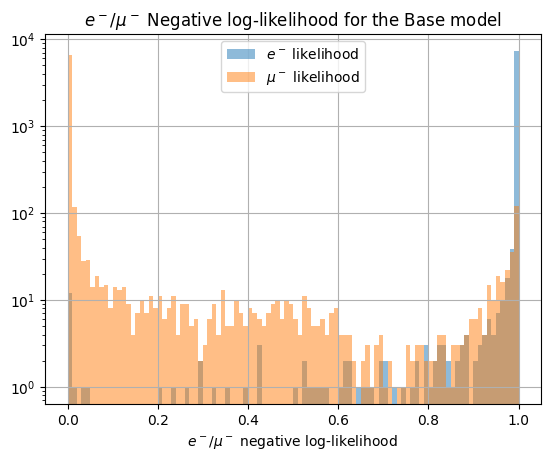

In [92]:
plt.hist(outputs_class[:,0][labels==0], bins=100, alpha=0.5, label=r'$e^-$ likelihood') 
plt.hist(outputs_class[:,0][labels==1], bins=100, alpha=0.5, label=r'$\mu^-$ likelihood')

plt.xlabel("$e^- / \mu^-$ negative log-likelihood ")
plt.grid()
plt.yscale('log')
plt.legend()
plt.title("$e^- / \mu^-$ Negative log-likelihood for the Base model")
plt.show()

In [93]:
from torchmetrics.classification import BinaryAccuracy
import torch
accuracy_calc = BinaryAccuracy(threshold=0.5)
acc=accuracy_calc(torch.tensor(outputs_class[:,1]), torch.tensor(labels))
print('Accuracy: {:.1f} %'.format(acc*100.))

Accuracy: 97.2 %


In [94]:
eevents = np.where(labels ==0 ) ## indices 0 -> 7499 
mevents = np.where(labels == 1) ## indices 7500 -> 14999

eoutputs_class = outputs_class[eevents]    
moutputs_class = outputs_class[mevents]
eacc = accuracy_calc(torch.tensor(eoutputs_class[:,1]), torch.tensor(labels[eevents]))
macc = accuracy_calc(torch.tensor(moutputs_class[0:,1]), torch.tensor(labels[mevents]))
print('Electron PID accuracy: {:.2f}%'.format(eacc*100))
print('Muon PID accuracy: {:.2f}%'.format(macc*100))

Electron PID accuracy: 99.65%
Muon PID accuracy: 94.72%


In [95]:
from torchmetrics.classification import BinaryF1Score
from torchmetrics.classification import BinaryPrecision
from torchmetrics.classification import BinaryRecall


f1score = BinaryF1Score(threshold=0.5)
f1s=f1score(torch.tensor(outputs_class[:,1]), torch.tensor(labels))
print('f1 score: {:.1f} %'.format(acc*100.))

precision1 = BinaryPrecision()
prec1 = precision1(torch.tensor(outputs_class[:,1]), torch.tensor(labels))
print('Precision: {:.1f} %'.format(prec1*100.))

recall1 = BinaryRecall()
recal1 = recall1(torch.tensor(outputs_class[:,1]), torch.tensor(labels))
print('Recall: {:.1f} %'.format(recal1*100.))

from torchmetrics.classification import BinaryConfusionMatrix
ConfusionMatrix = BinaryConfusionMatrix()

ConfusionMatrix_result = ConfusionMatrix(torch.tensor(outputs_class[:,1]), torch.tensor(labels))
print('Confusion Matrix')
print(ConfusionMatrix_result)




f1 score: 97.2 %
Precision: 99.6 %
Recall: 94.7 %
Confusion Matrix
tensor([[7474,   26],
        [ 396, 7104]])


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

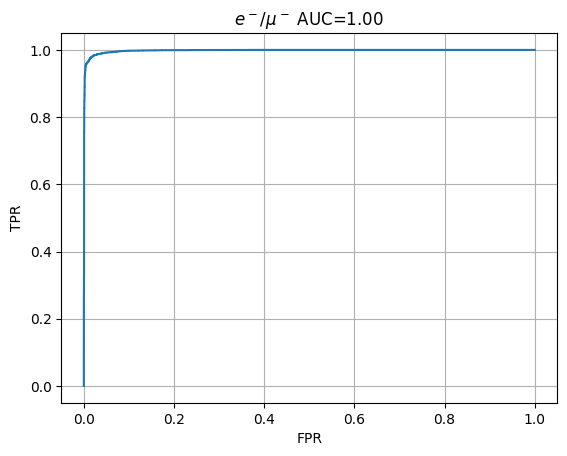

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(labels, outputs_class[:,1])
auc = roc_auc_score(labels, outputs_class[:,1])

title=r'$e^-/\mu^-$ AUC={:.2f}'.format(auc)
plt.title(title)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.ylabel

### Comparison of the outputs and the normalised variables ###

In [97]:
titles = ['Energy', 'Position:X', 'Position:Y', 'Position:Z']
#for i in range(len(titles)):
    #plt.title(titles[i])
    #plt.hist(targets[:,i], bins=100, alpha=0.5, label='True')
    #plt.hist(outputs_targets[:,i], bins=100, alpha=0.5, label='Recon')
    #plt.grid()
    #plt.legend()
    #plt.show()


In [98]:
from sklearn.metrics import mean_squared_error 
for i in range(len(titles)):
    
    mse_targets = mean_squared_error(outputs_targets[:,i], targets[:,i])
    var_targets = sklearn.metrics.explained_variance_score(outputs_targets[:,i], targets[:,i])

    print(titles[i])
    
    print('Mean Squared Error: {:.1f} %'.format(mse_targets*100.))
    print('Variance Score: {:.1f} %'.format(var_targets*100.))
    

Energy
Mean Squared Error: 0.7 %
Variance Score: 94.8 %
Position:X
Mean Squared Error: 0.1 %
Variance Score: 97.7 %
Position:Y
Mean Squared Error: 0.1 %
Variance Score: 97.8 %
Position:Z
Mean Squared Error: 0.1 %
Variance Score: 98.3 %


#### Scale to orgiginal ####

In [99]:
targets_scaled = targets*mean_scale['targets']['scale'][:4].numpy()+mean_scale['targets']['mean'][:4].numpy()
recons_scaled = outputs_targets*mean_scale['targets']['scale'][:4].numpy()+mean_scale['targets']['mean'][:4].numpy()

In [100]:
## rectangular coordinate to spherical coordinate
def rec2sph(rec):
    print(rec[2].shape)
    r=np.linalg.norm(rec,ord=2,axis=0)
    print(r.shape)
    theta=np.arccos(rec[2]/r)
    rho=np.linalg.norm(rec[:2], ord=2, axis=0)
    phi=np.arccos(rec[0]/rho)
    #phi=phi*-1 if rec[1]<0 else phi
    phi=np.where(rec[1]<0, phi, phi*-1)
    #return np.array([r,theta,phi])
    return r,theta,phi

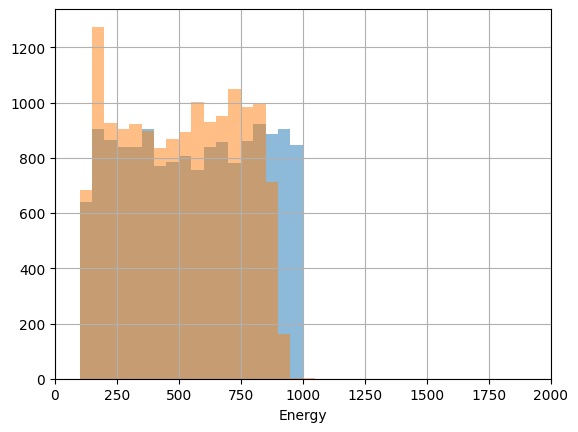

E
Mean Squared Error: 566739.2 %
Variance Score: 95.9 %


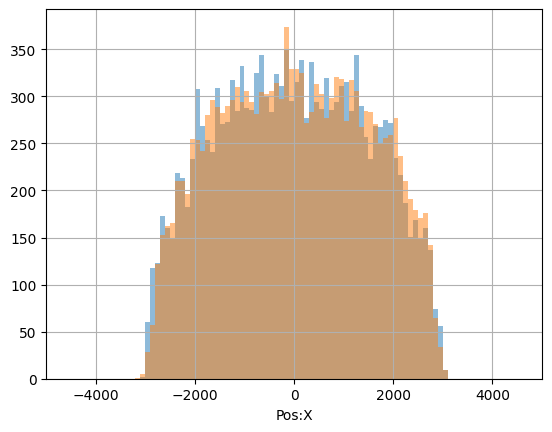

o
Mean Squared Error: 5286777.3 %
Variance Score: 97.7 %


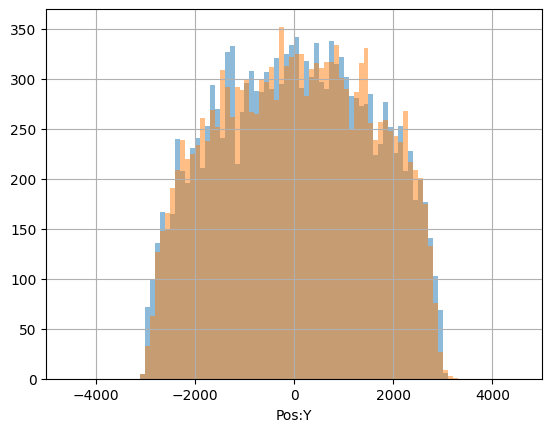

s
Mean Squared Error: 4918394.9 %
Variance Score: 97.9 %


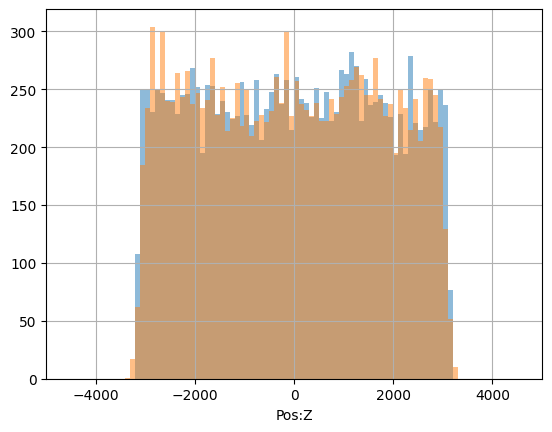

:
Mean Squared Error: 5577151.6 %
Variance Score: 98.3 %


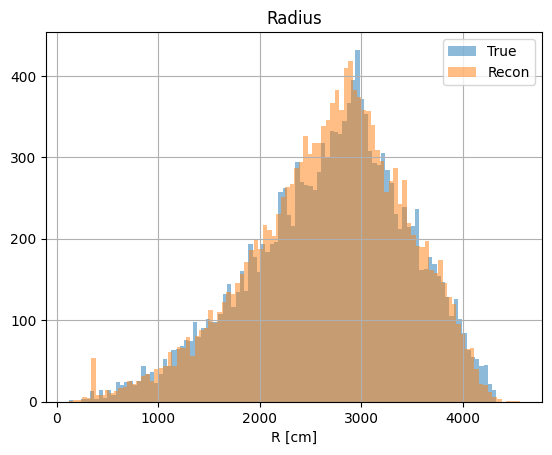

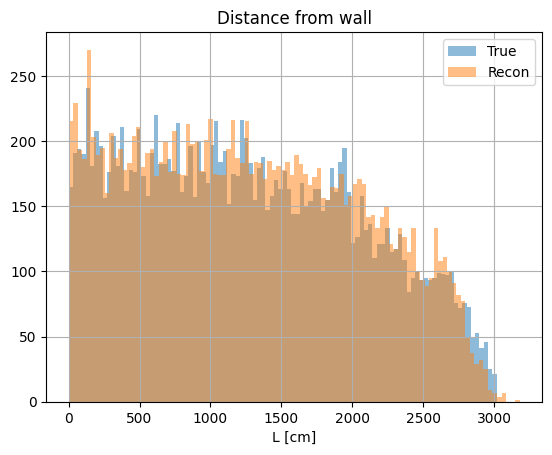

(15000,)
(15000,)
(15000,)
(15000,)


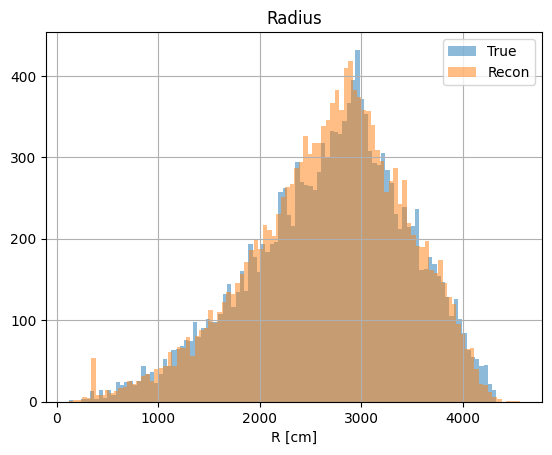

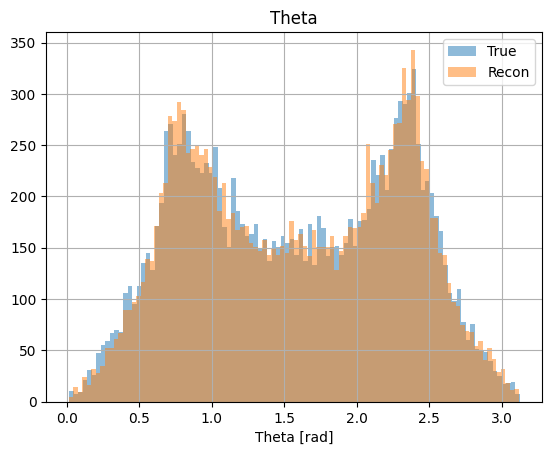

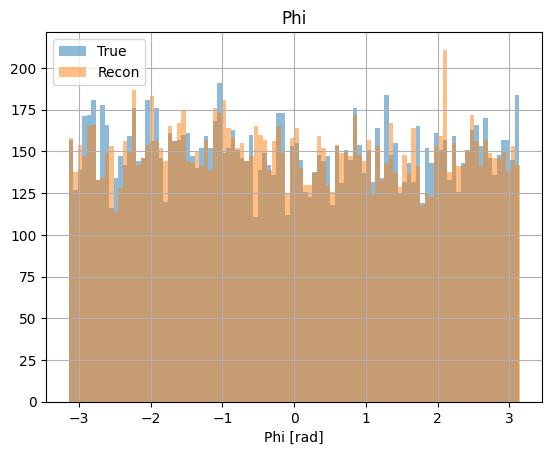

In [101]:
targets

variables = ['Energy', 'Pos:X', 'Pos:Y', 'Pos:Z']
bin_widths={'Type':1, 'Energy':50, 'Pos:X':100, 'Pos:Y':100, 'Pos:Z':100, 'Dir:Theta':np.pi/18, 'Dir:Phi':np.pi/18}
ranges = {'Type':[-1,2], 'Energy':[0,2000], 'Pos:X':[-5000,5000], 'Pos:Y':[-5000,5000], 'Pos:Z':[-5000,5000], 'Dir:Theta':[-np.pi,np.pi*2], 'Dir:Phi':[-np.pi*2, np.pi*2]} 
for i in range(len(variables)):
    variable=variables[i]

    bins=int((ranges[variable][1]-ranges[variable][0])/bin_widths[variable])
    plt.hist(targets_scaled[:,i], bins=bins, range=ranges[variable], alpha=0.5, label='True')
    plt.hist(recons_scaled[:,i], bins=bins, range=ranges[variable], alpha=0.5, label='Recon')
    plt.xlabel(variable)
    #plt.ylabel('Recon - True')
    #plt.ylim([-500,500])
    plt.xlim([ranges[variable][0],ranges[variable][1]])
    plt.grid()
    plt.show()
    # New Addition
    mse_targets = mean_squared_error(targets_scaled[:,i],recons_scaled[:,i])
    var_targets = sklearn.metrics.explained_variance_score(targets_scaled[:,i], recons_scaled[:,i])

    print(variable[i])
    
    print('Mean Squared Error: {:.1f} %'.format(mse_targets*100.))
    print('Variance Score: {:.1f} %'.format(var_targets*100.))


    if variable=='Pos:Z':
        r_true=np.linalg.norm(targets_scaled[:,1:], ord=2, axis=1)
        r_recon=np.linalg.norm(recons_scaled[:,1:], ord=2, axis=1)
        plt.title('Radius')
        plt.hist(r_true, bins=100, alpha=0.5, label='True')
        plt.hist(r_recon, bins=100, alpha=0.5, label='Recon')
        plt.xlabel('R [cm]')
        plt.grid()
        plt.legend()
        plt.show()

        l_true=np.linalg.norm(targets_scaled[:,1:2], ord=2, axis=1)
        l_recon=np.linalg.norm(recons_scaled[:,1:2], ord=2, axis=1)
        plt.title('Distance from wall')
        plt.hist(l_true, bins=100, alpha=0.5, label='True')
        plt.hist(l_recon, bins=100, alpha=0.5, label='Recon')
        plt.xlabel('L [cm]')
        plt.grid()
        plt.legend()
        plt.show()

        rec_true = [targets_scaled[:,1], targets_scaled[:,2], targets_scaled[:,3]] 
        posR_true,posTheta_true,posPhi_true = rec2sph(rec_true)
        rec_recon = [recons_scaled[:,1], recons_scaled[:,2], recons_scaled[:,3]] 
        posR_recon,posTheta_recon,posPhi_recon = rec2sph(rec_recon)

        plt.title('Radius')
        plt.hist(posR_true, bins=100, alpha=0.5, label='True')
        plt.hist(posR_recon, bins=100, alpha=0.5, label='Recon')
        plt.xlabel('R [cm]')
        plt.grid()
        plt.legend()
        plt.show()

        plt.title('Theta')
        plt.hist(posTheta_true, bins=100, alpha=0.5, label='True')
        plt.hist(posTheta_recon, bins=100, alpha=0.5, label='Recon')
        plt.xlabel('Theta [rad]')
        plt.grid()
        plt.legend()
        plt.show()

        plt.title('Phi')
        plt.hist(posPhi_true, bins=100, alpha=0.5, label='True')
        plt.hist(posPhi_recon, bins=100, alpha=0.5, label='Recon')
        plt.xlabel('Phi [rad]')
        plt.grid()
        plt.legend()
        plt.show()


In [102]:
from sklearn.metrics import mean_squared_error 
for i in range(len(titles)):
    print(titles[i])
    acc_targets = mean_squared_error(outputs_targets[:,i], targets[:,i])

    
    print('Accuracy: {:.1f} %'.format(acc_targets*100.))

Energy
Accuracy: 0.7 %
Position:X
Accuracy: 0.1 %
Position:Y
Accuracy: 0.1 %
Position:Z
Accuracy: 0.1 %


### Functions ###

In [103]:
# function to check energy, position dependency
def binning(target, x, bin_width, bin_range):
    bins = int((bin_range[1]-bin_range[0])/bin_width)
    binned = []
    for i in range(bins):
        binned.append(x[((target>=(bin_range[0]+i*bin_width))&(target<(bin_range[0]+(i+1)*bin_width)))])

    return binned

In [104]:
def gaussian(x, amp, loc, sig):
    return amp*np.exp(-np.power(x - loc, 2.) / (2 * np.power(sig, 2.)))

### Energy resolution ###
* Energy resolution depends on the energy

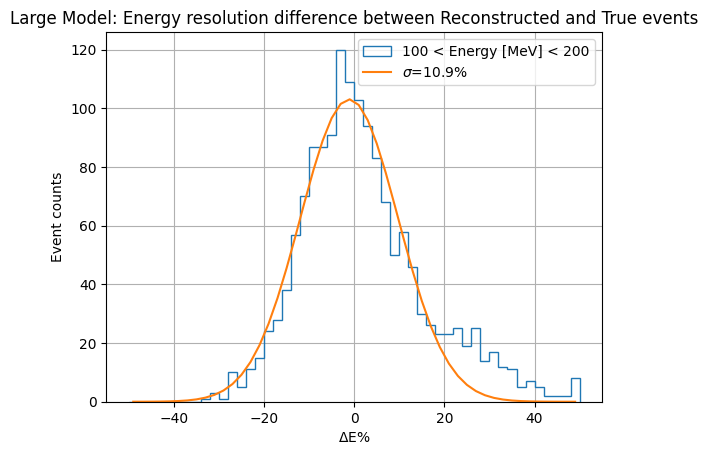

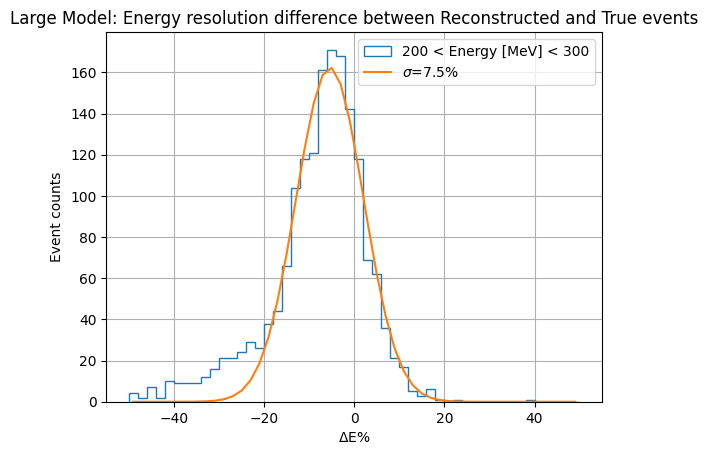

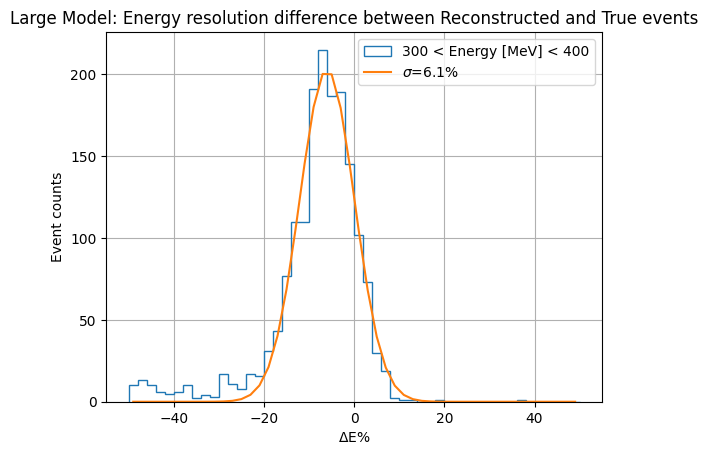

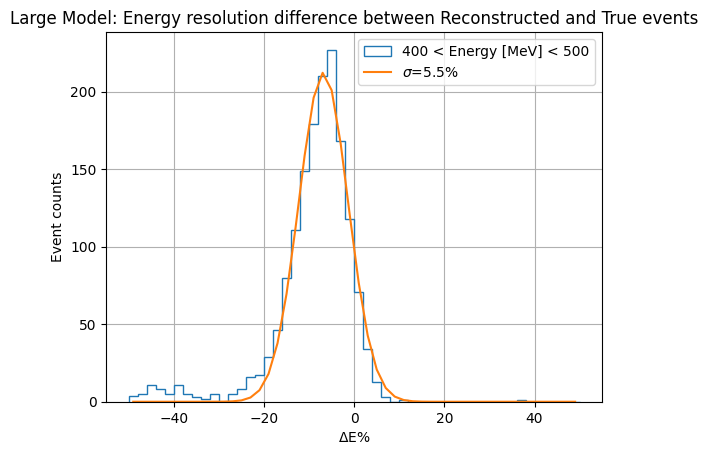

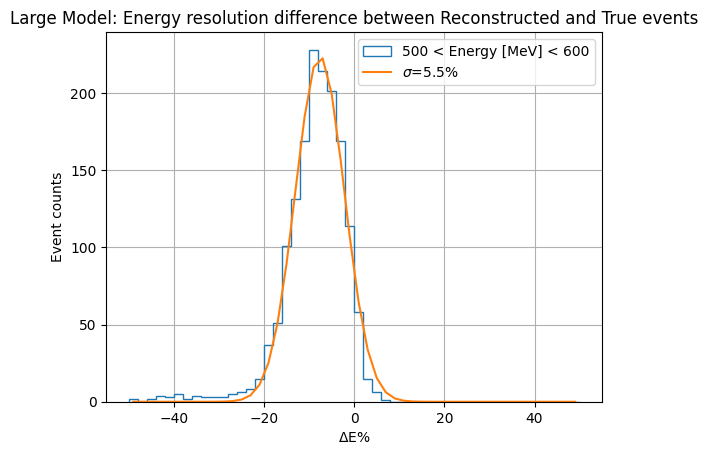

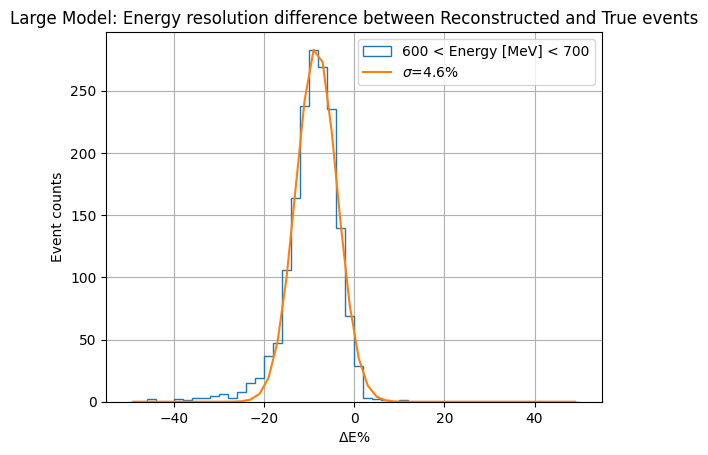

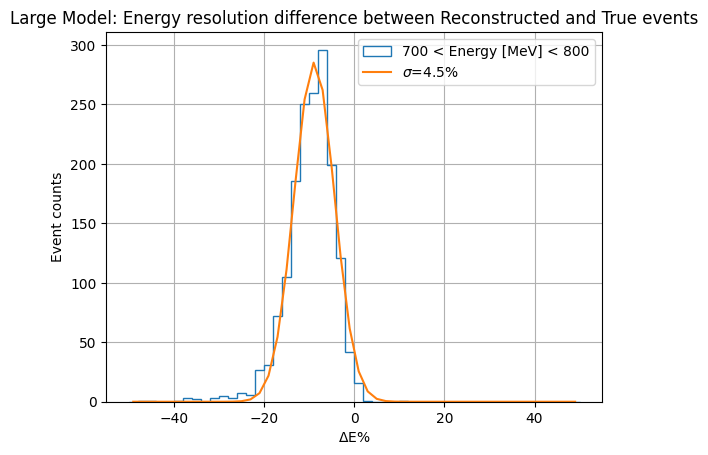

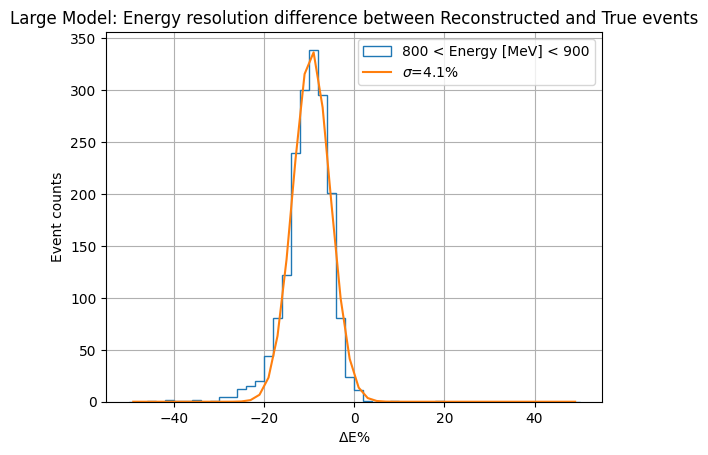

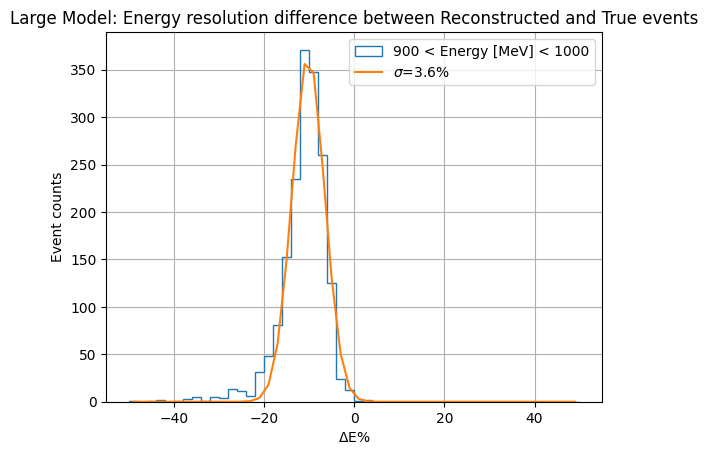

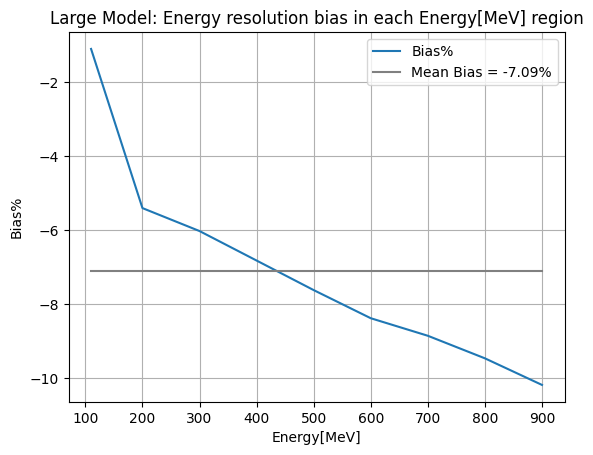

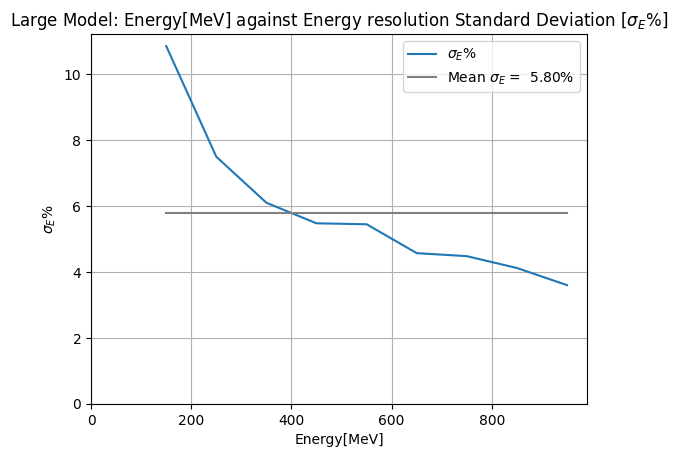

In [105]:
## Outputs the Reconstructed Resolution + Bias + Standard Deviation


bias=(recons_scaled-targets_scaled)/targets_scaled * 100. # %
# Energy resolution
#delE=difference[:,1]
delE=bias[:,0]

energy_range=[100,1000]
bin_width=100
delE_binned=binning(targets_scaled[:,0], delE, bin_width=bin_width, bin_range=energy_range)

sigma_E=[]
E=[]
ybias = []
fit_mean_bin = []
for i in range(len(delE_binned)):
    lower=energy_range[0]+bin_width*i
    higher=energy_range[0]+bin_width*(i+1)
    E.append(lower+(higher-lower)/2.)
    label='{:d} < Energy [MeV] < {:d}'.format(lower,higher)
    hist_delE=plt.hist(delE_binned[i], bins=50, range=[-50,50], label=label , histtype='step', lw=2, density=False)
    x_hist_delE = (hist_delE[1][1:]+hist_delE[1][0:-1])/2.
    y_hist_delE = hist_delE[0]
    p0 = [y_hist_delE.max(), delE.mean(), delE.std()]
    p, pcov = curve_fit(gaussian, x_hist_delE, y_hist_delE, p0=p0)
    fit=gaussian(x_hist_delE, p[0], p[1], p[2])
    label='$\sigma$={:.1f}%'.format(p[2])
    sigma_E.append(p[2])
    ybias.append(p[1])

    

    plt.plot(x_hist_delE, fit, label=label)
    plt.xlabel('$\Delta$E%')
    plt.ylabel('Event counts')
    plt.title('Large Model: Energy resolution difference between Reconstructed and True events')
    plt.legend()
    plt.grid()
    plt.show()


y_bias_mean = sum(ybias) / len(ybias) 
y_bias_array = [y_bias_mean] * len(ybias)
 

x = [110, 200, 300, 400, 500, 600, 700, 800, 900]
plt.plot(x, ybias, label = 'Bias%')
plt.plot(x, y_bias_array, color = 'grey', label = f'Mean Bias = {y_bias_mean:.2f}%')
plt.plot()
plt.xlabel('Energy[MeV]')
plt.ylabel('Bias%')
plt.title(f'Large Model: Energy resolution bias in each Energy[MeV] region')
plt.legend()
plt.grid()
plt.show()

sigma_E_mean = sum(sigma_E) / len(sigma_E)
sigma_E_array = [sigma_E_mean] * len(sigma_E)


label_E = "E"

plt.plot(E,sigma_E, label = '$\sigma_{E}$%')
plt.plot(E,sigma_E_array, color = 'grey', label = f'Mean $\sigma_{label_E}$ =  {sigma_E_mean:.2f}%')
plt.xlim([0.,None])
plt.ylim([0.,None])
plt.xlabel('Energy[MeV]')
plt.ylabel('$\sigma_{E}$%')
plt.title('Large Model: Energy[MeV] against Energy resolution Standard Deviation [$\sigma_{E}$%]')
plt.legend()
plt.grid()
plt.show()

In [106]:
def Reconstructed_Energy_Resolution(recons_scaled, targets_scaled, type):
    ## For each particle type:
    ## Outputs graphs of Energy resolution
    ## Returns bias and standard deviation
    bias=(recons_scaled-targets_scaled)/targets_scaled * 100. # %
    delE=bias[:,0]
    energy_range=[100,1000]
    bin_width=100
    delE_binned=binning(targets_scaled[:,0], delE, bin_width=bin_width, bin_range=energy_range)
    
    sigma_E=[]
    E=[]
    ybias = []
    fit_mean_bin = []
    for i in range(len(delE_binned)):
        lower=energy_range[0]+bin_width*i
        higher=energy_range[0]+bin_width*(i+1)
        E.append(lower+(higher-lower)/2.)
        label='{:d} < Energy [MeV] < {:d}'.format(lower,higher)
        hist_delE=plt.hist(delE_binned[i], bins=50, range=[-50,50], label=label , histtype='step', lw=2, density=False)
        x_hist_delE = (hist_delE[1][1:]+hist_delE[1][0:-1])/2.
        y_hist_delE = hist_delE[0]
        p0 = [y_hist_delE.max(), delE.mean(), delE.std()]
        p, pcov = curve_fit(gaussian, x_hist_delE, y_hist_delE, p0=p0)
        fit=gaussian(x_hist_delE, p[0], p[1], p[2])
        label='$\sigma$={:.1f}%'.format(p[2])
        sigma_E.append(p[2])
        ybias.append(p[1])
        
        plt.plot(x_hist_delE, fit, label=label)
        plt.xlabel('$\Delta$E%')
        plt.ylabel('Event counts')
        plt.title(f'{type} Energy resolution difference between Reconstructed and True events')
        plt.legend()
        plt.grid()
        plt.show()
        
    return ybias, E, sigma_E

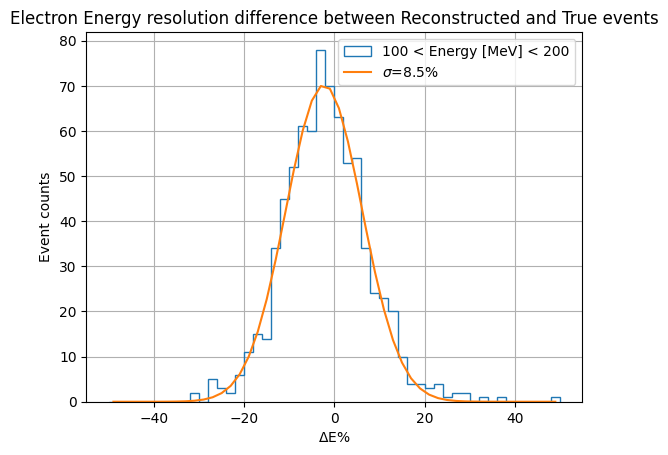

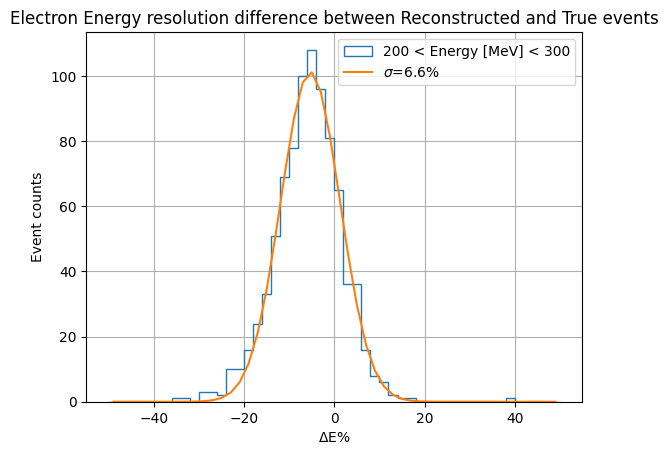

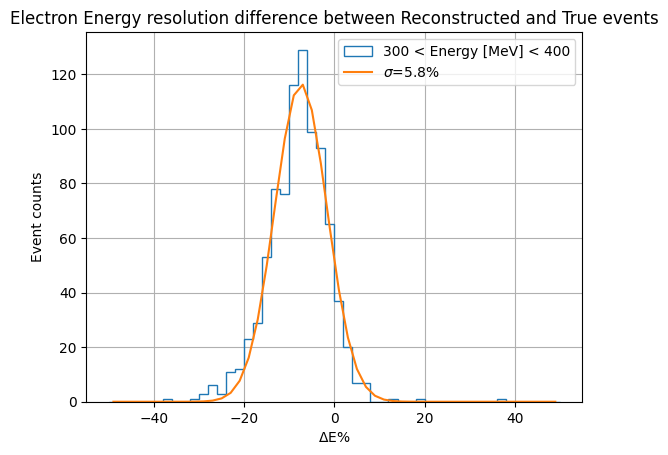

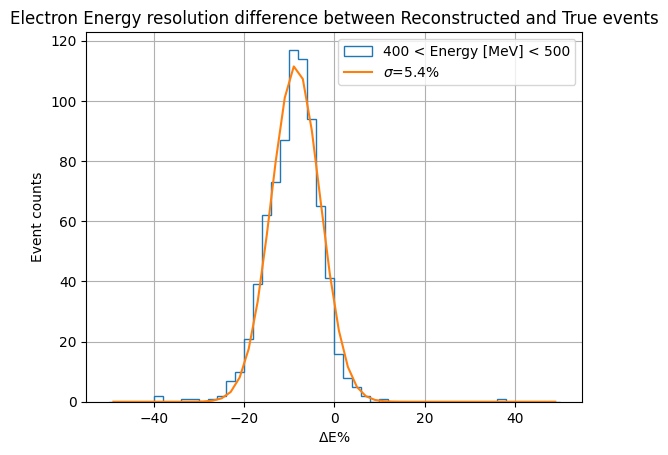

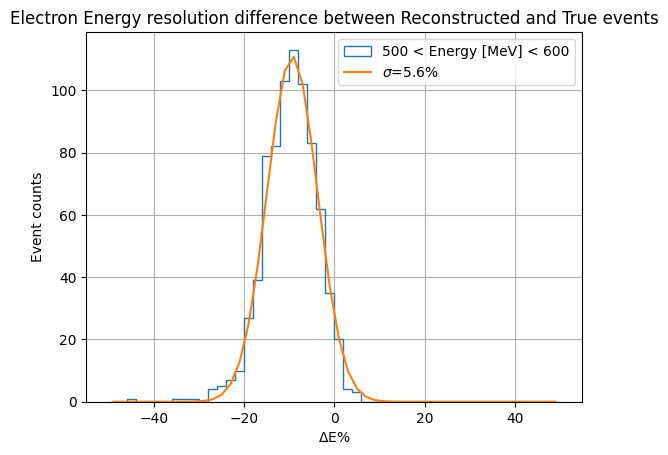

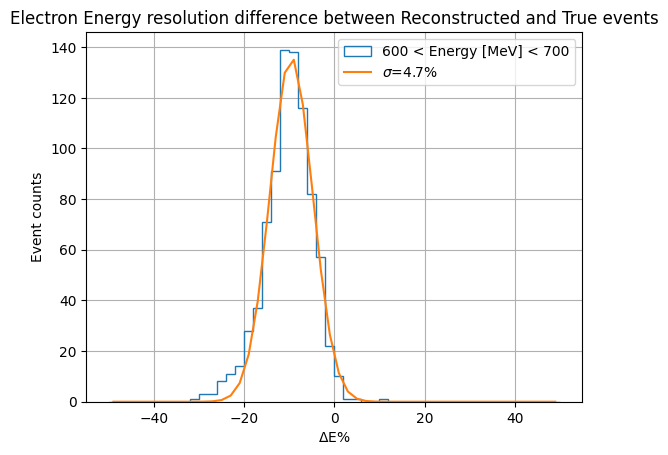

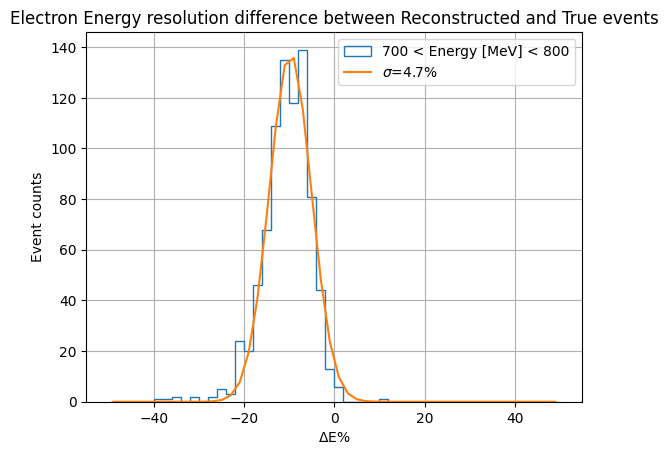

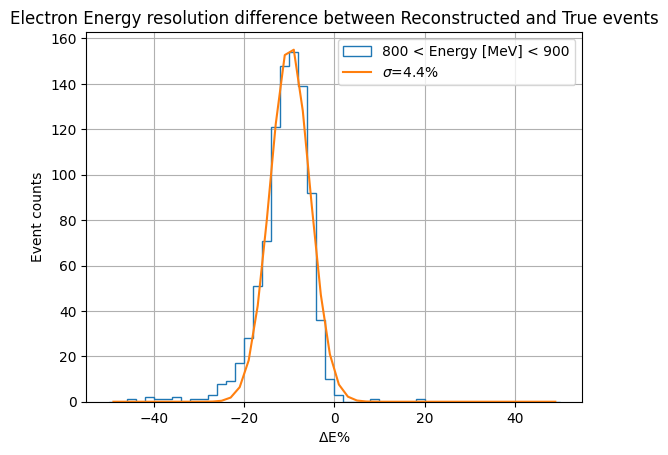

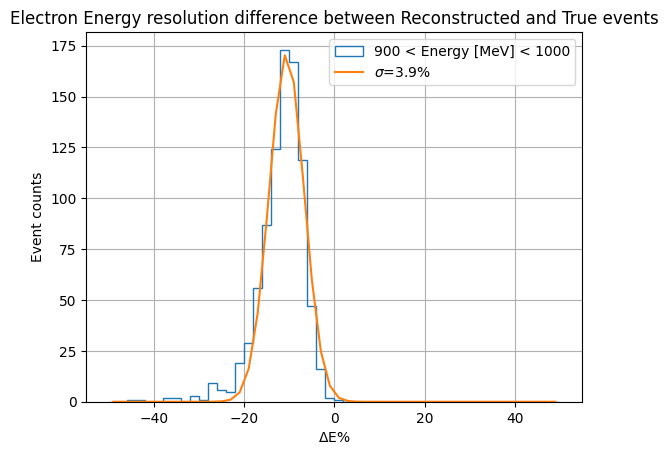

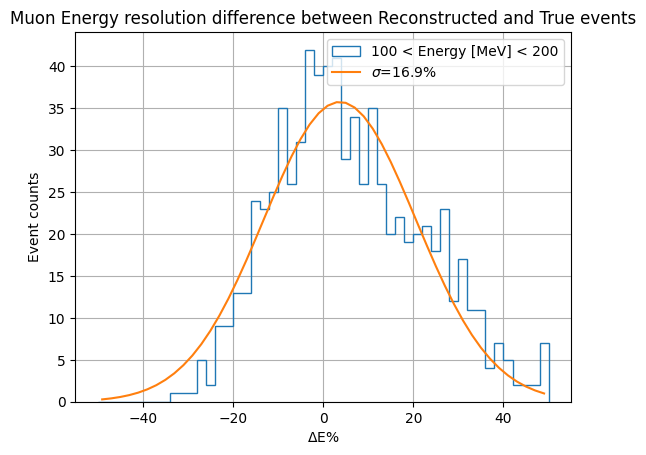

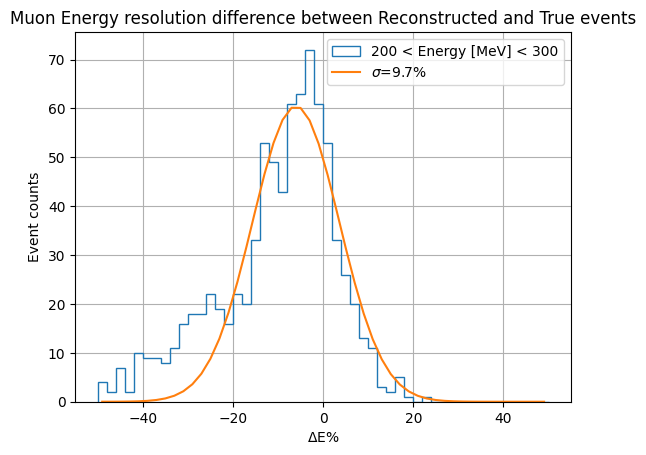

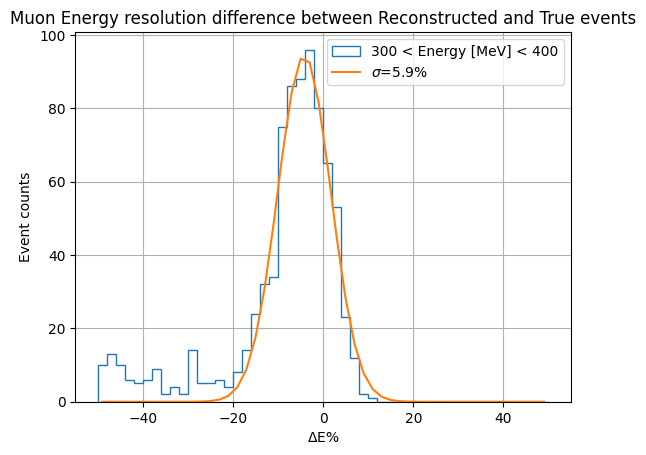

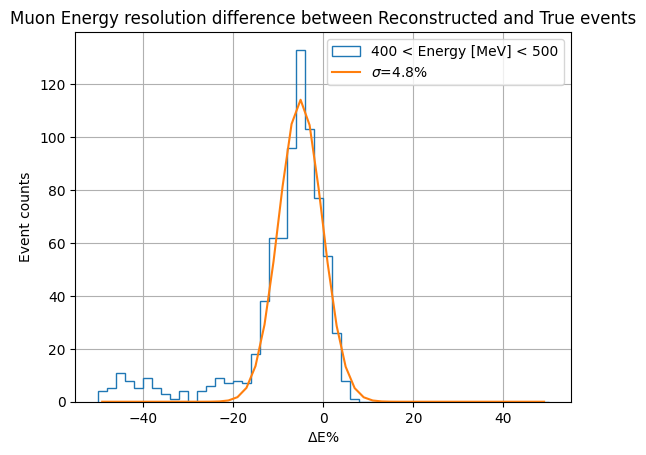

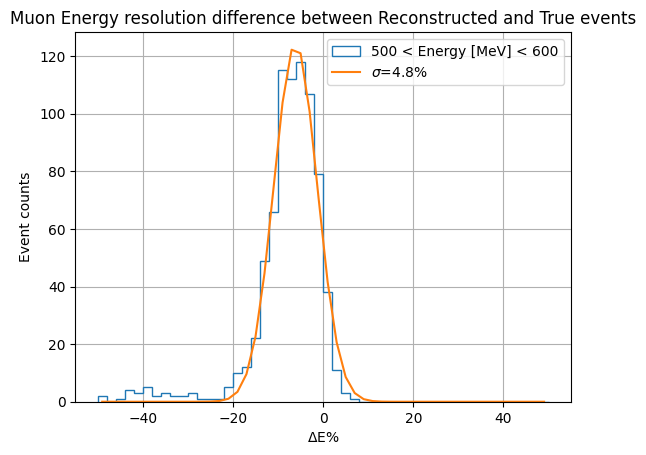

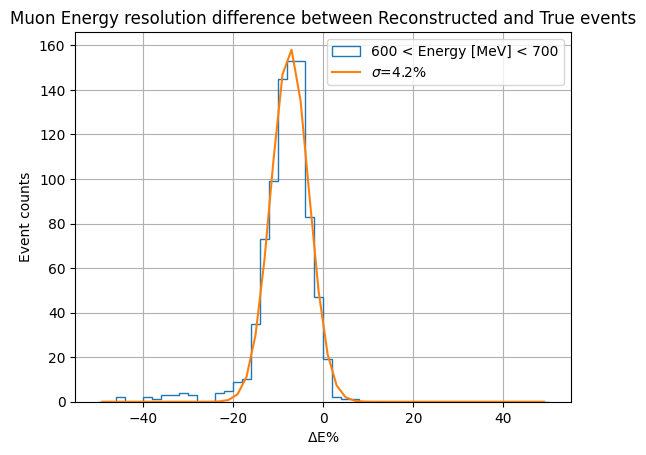

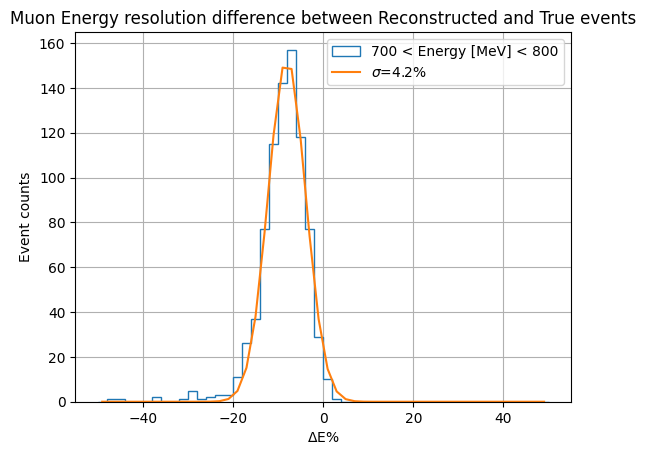

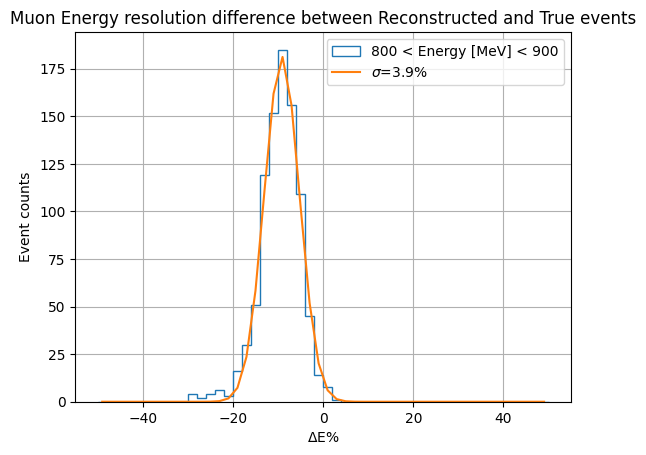

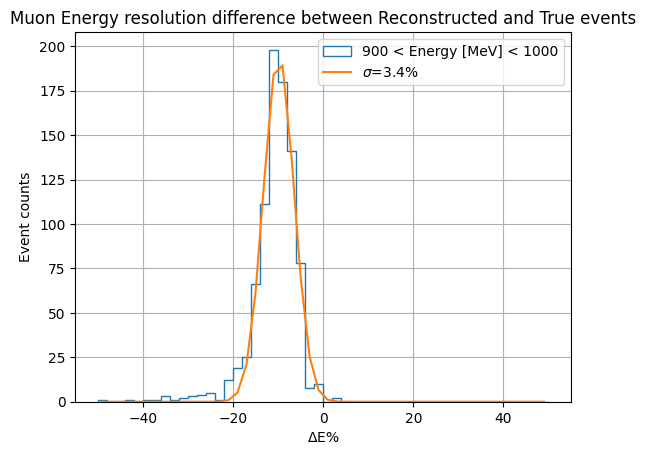

In [107]:
erecons_scaled = recons_scaled[eevents]
etargets_scaled = targets_scaled[eevents]
eparticle = 'Electron'

mrecons_scaled = recons_scaled[mevents]
mtargets_scaled = targets_scaled[mevents]
mparticle = 'Muon'

e_ybias, e_E, e_sigma_E = Reconstructed_Energy_Resolution(erecons_scaled, etargets_scaled, eparticle)
m_ybias, m_E, m_sigma_E = Reconstructed_Energy_Resolution(mrecons_scaled, mtargets_scaled, mparticle)

mean electron bias -8.08%
mean muon bias -5.78%
mean electron Standard Deviation 5.51%
mean muon Standard Deviation 6.41%


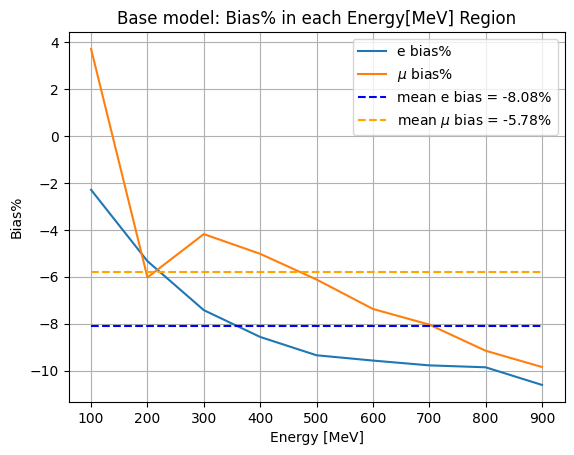

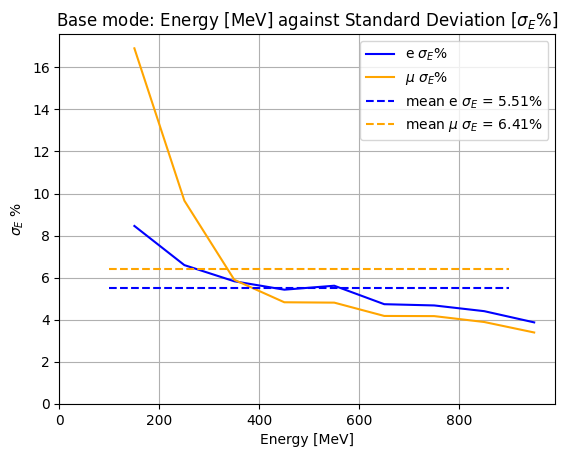

In [108]:
erecons_scaled = recons_scaled[eevents]
etargets_scaled = targets_scaled[eevents]
eparticle = 'Electron'

mrecons_scaled = recons_scaled[mevents]
mtargets_scaled = targets_scaled[mevents]
mparticle = 'Muon'


e_ybias_mean = sum(e_ybias) / len(e_ybias)
m_ybias_mean = sum(m_ybias) / len(m_ybias)

e_ybias_array = [e_ybias_mean] * len(e_ybias)
m_ybias_array = [m_ybias_mean] * len(m_ybias)


print('mean electron bias {:.3}%'.format(e_ybias_mean))
print('mean muon bias {:.3}%'.format(m_ybias_mean))


e_sigma_E_mean = sum(e_sigma_E) / len(e_sigma_E)
m_sigma_E_mean = sum(m_sigma_E) / len(m_sigma_E)

e_sigma_E_array = [e_sigma_E_mean] * len(e_sigma_E)
m_sigma_E_array = [m_sigma_E_mean] * len(m_sigma_E)


print('mean electron Standard Deviation {:.3}%'.format(e_sigma_E_mean))
print('mean muon Standard Deviation {:.3}%'.format(m_sigma_E_mean))


x = [100, 200, 300, 400, 500, 600, 700, 800, 900] ## MeV range

plt.plot(x, e_ybias, label = 'e bias%')
plt.plot(x, m_ybias, label = '$\mu$ bias%')
plt.plot(x, e_ybias_array, linestyle = 'dashed', color = 'blue', label = f'mean e bias = {e_ybias_mean:.2f}%')
plt.plot(x, m_ybias_array, linestyle = 'dashed', color = 'orange', label = f'mean $\mu$ bias = {m_ybias_mean:.2f}%')

plt.xlabel('Energy [MeV]')
plt.ylabel('Bias%')
plt.title(f'Base model: Bias% in each Energy[MeV] Region')
plt.grid()
plt.legend()
plt.show()


plt.plot(e_E, e_sigma_E, color = 'blue', label = 'e $\sigma_{E}$%')
plt.plot(m_E, m_sigma_E, color = 'orange', label = '$\mu$ $\sigma_{E}$%')
plt.plot(x, e_sigma_E_array, linestyle = 'dashed', color = 'blue', label = f'mean e $\sigma_{label_E}$ = {e_sigma_E_mean:.2f}%')
plt.plot(x, m_sigma_E_array, linestyle = 'dashed', color = 'orange', label = f'mean $\mu$ $\sigma_{label_E}$ = {m_sigma_E_mean:.2f}%')


plt.xlim([0.,None])
plt.ylim([0.,None])
plt.xlabel('Energy [MeV]')
plt.ylabel('$\sigma_{E}$ %')
plt.title('Base mode: Energy [MeV] against Standard Deviation [$\sigma_{E}$%]')
plt.grid()
plt.legend()
plt.show()

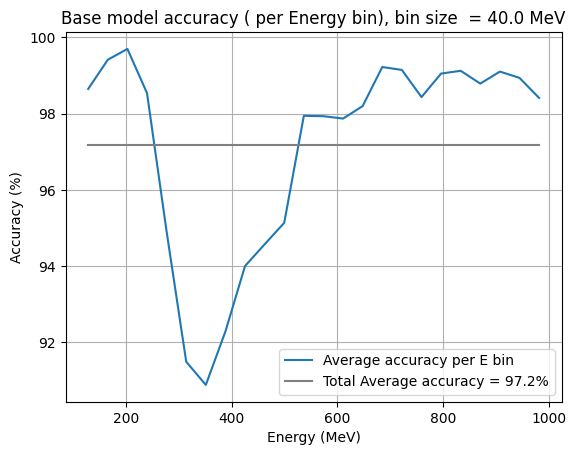

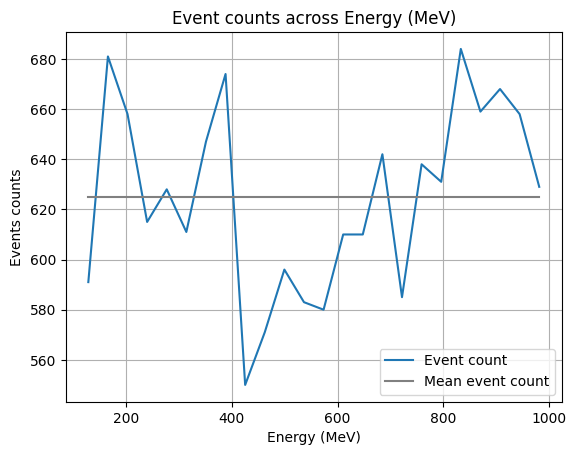

In [109]:
## Returns the Accuracy across Energy bins
## Returns Number of events per energy
bin_num = 25
bins = np.linspace(min(targets_scaled[:,0]), max(targets_scaled[:,0]), bin_num)  
energy = targets_scaled[:,0]

bin_indices = np.digitize(energy, bins)

split_energy = {i: [] for i in range(len(bins)-1)}
split_oute = {i: [] for i in range(len(bins)-1)}
split_labele = {i: [] for i in range(len(bins)-1)}


for i, bin_idx in enumerate(bin_indices):
    if 0 < bin_idx < len(bins):  
        split_energy[bin_idx-1].append(energy[i])
        split_oute[bin_idx-1].append(outputs_class[i, 1])
        split_labele[bin_idx-1].append(labels[i])


split_energy = {k: np.array(v) for k, v in split_energy.items()}
split_oute = {k: np.array(v) for k, v in split_oute.items()}
split_labelse = {k: np.array(v) for k, v in split_labele.items()}


acc_splite = []
xplote = []
ymeane = []
enums = []
for k in split_energy:
    acc_splite.append(accuracy_calc(torch.tensor(split_oute[k]), torch.tensor(split_labelse[k]))*100)
    xplote.append((bins[k]+bins[k+1])/2)
    ymeane.append(acc*100)
    enums.append(len(split_energy[k]))
    #print(f"Accuracy in region R = {np.round(bins[k])} - {np.round(bins[k+1])}cm: {np.round(acc_split[k])}%")

enums_mean = sum(enums) / len(enums) 
enums_mean_array = [enums_mean] * len(enums)

plt.plot(xplote, acc_splite, label = 'Average accuracy per E bin')
plt.plot(xplote, ymeane, color = 'grey', label = 'Total Average accuracy = {:.1f}%'.format(acc*100))
plt.ylabel("Accuracy (%)")
plt.xlabel("Energy (MeV)")
plt.legend()
plt.title(f"Base model accuracy ( per Energy bin), bin size  = {np.round(max(energy)/bin_num)} MeV")
plt.grid()
plt.show()


plt.plot(xplote, enums, label = 'Event count')
plt.plot(xplote, enums_mean_array, color = 'grey', label = 'Mean event count')
plt.title("Event counts across Energy (MeV)")
plt.xlabel("Energy (MeV)")
plt.ylabel("Events counts")
plt.legend()
plt.grid()
plt.show()


In [110]:
# Electron and Muon energy reconstruction 

def Reconstruction_Energy(recons_scaled, targets_scaled, type):
    #PID Accuracy as a function of energy
    bin_num = 25
    bins = np.linspace(min(targets_scaled[:,0]), max(targets_scaled[:,0]), bin_num)  
    energy = targets_scaled[:,0]
    bin_indices = np.digitize(energy, bins)

    split_energy = {i: [] for i in range(len(bins)-1)}
    split_oute = {i: [] for i in range(len(bins)-1)}
    split_labele = {i: [] for i in range(len(bins)-1)}
    
    for i, bin_idx in enumerate(bin_indices):
        if 0 < bin_idx < len(bins):  
            split_energy[bin_idx-1].append(energy[i])
            split_oute[bin_idx-1].append(outputs_class[i, 1])
            split_labele[bin_idx-1].append(labels[i])
            
    split_energy = {k: np.array(v) for k, v in split_energy.items()}
    split_oute = {k: np.array(v) for k, v in split_oute.items()}
    split_labelse = {k: np.array(v) for k, v in split_labele.items()}
    
    acc_splite = []
    xplote = []
    ymeane = []
    enums = []
    
    for k in split_energy:
        acc_splite.append(accuracy_calc(torch.tensor(split_oute[k]), torch.tensor(split_labelse[k]))*100)
        xplote.append((bins[k]+bins[k+1])/2)
        ymeane.append(acc*100)
        enums.append(len(split_energy[k]))


    enums_mean = sum(enums) / len(enums)   
    enums_mean_array = [enums_mean] * len(enums)

    plt.plot(xplote, acc_splite, label = 'Average accuracy per E bin')
    plt.plot(xplote, ymeane, color = 'grey', label = 'Total Average accuracy = {:.1f}%'.format(acc*100))
    plt.ylabel("Accuracy (%)")
    plt.xlabel("Energy (MeV)")
    plt.legend()
    plt.title(f"Base model: {type} accuracy ( per Energy bin), bin size  = {np.round(max(energy)/bin_num)} MeV")
    plt.grid()
    plt.show()
    
    plt.plot(xplote, enums, label = 'Event count')
    plt.plot(xplote, enums_mean_array, color = 'grey', label = 'Mean event count {:.1f}'.format(enums_mean))
    plt.title(f"{type} Number of events")
    plt.xlabel("Energy (MeV)")
    plt.ylabel("Number of Events")
    plt.legend()
    plt.grid()
    plt.show()


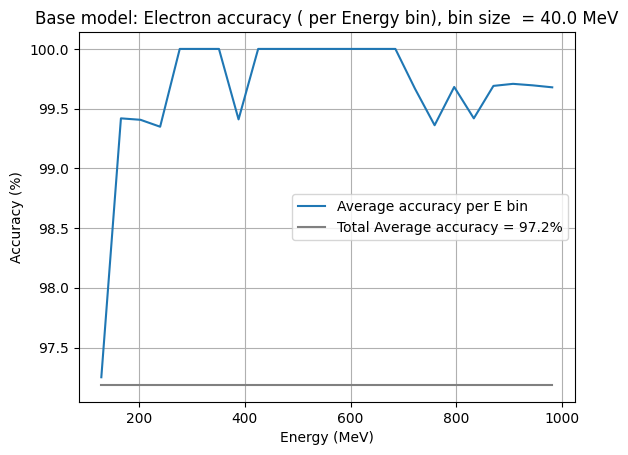

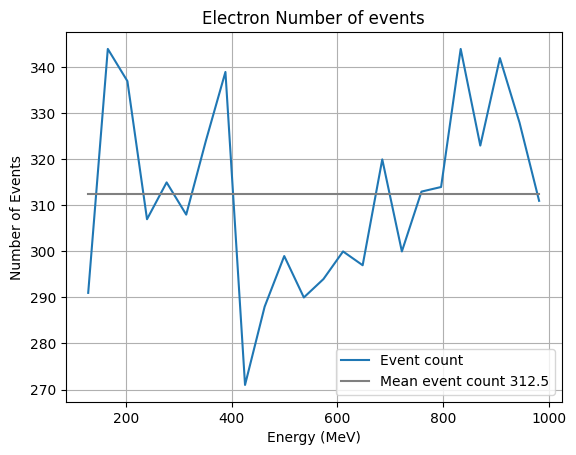

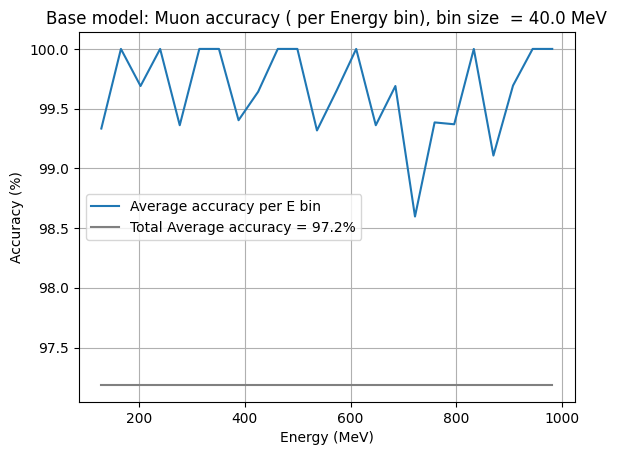

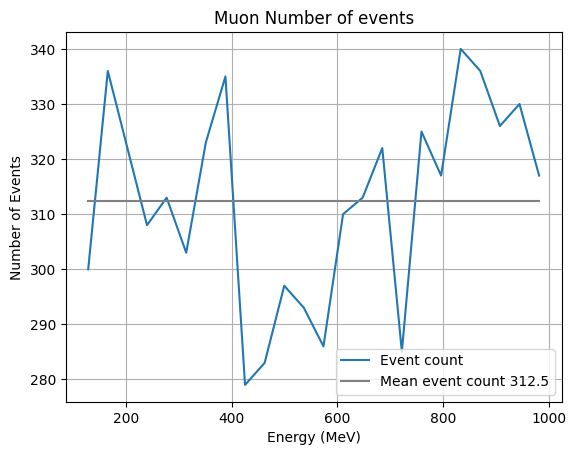

In [111]:
erecons_scaled = recons_scaled[eevents]
etargets_scaled = targets_scaled[eevents]
eparticle = 'Electron'

mrecons_scaled = recons_scaled[mevents]
mtargets_scaled = targets_scaled[mevents]
mparticle = 'Muon'

Reconstruction_Energy(erecons_scaled, etargets_scaled, eparticle)
Reconstruction_Energy(mrecons_scaled, mtargets_scaled, mparticle)


In [112]:
# Define Phi boundaries for 4 regions (assuming 0 to 2π range)
phi_bounds = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]

# Create masks for each region
mask1 = (posPhi_true >= phi_bounds[0]) & (posPhi_true < phi_bounds[1])
mask2 = (posPhi_true >= phi_bounds[1]) & (posPhi_true < phi_bounds[2])
mask3 = (posPhi_true >= phi_bounds[2]) & (posPhi_true < phi_bounds[3])
mask4 = (posPhi_true >= phi_bounds[3]) & (posPhi_true < phi_bounds[4])

# Apply masks to split Phi, R, and Z correctly


def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return rho, phi

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y 


x_recons, x_target = recons_scaled[:,1], targets_scaled[:,1]
y_recons, y_target = recons_scaled[:,2], targets_scaled[:,2]
z_recons, z_target = recons_scaled[:,3], targets_scaled[:,3]

posR_true, posPhi_true = cart2pol(targets_scaled[:,1], targets_scaled[:,2])

posR_recon, posPhi_recon = cart2pol(recons_scaled[:,1], recons_scaled[:,2])


# PID in each Region

Region 1 Accuracy: 96.9 %


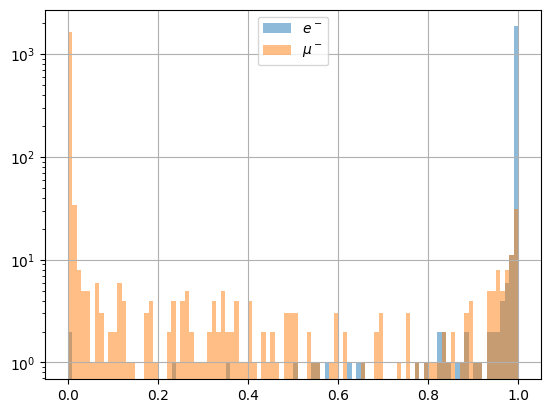

Region 2 Accuracy: 96.9 %


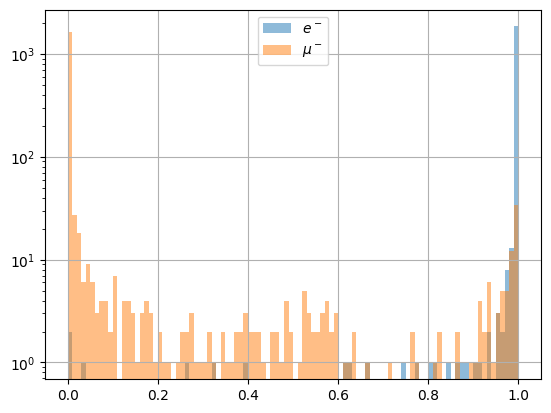

Region 3 Accuracy: 97.4 %


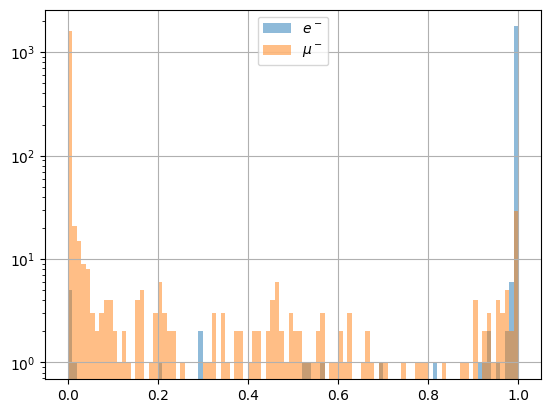

Region 4 Accuracy: 97.7 %


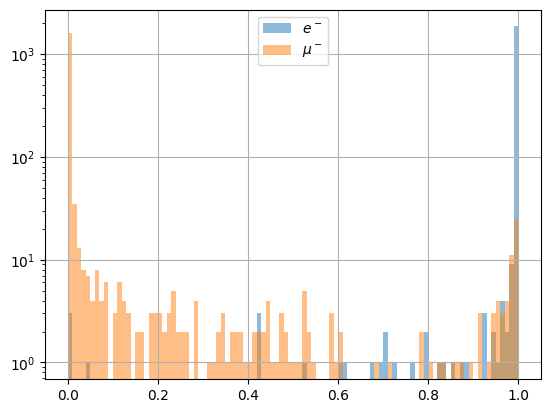

In [113]:

mask1_labels0 = (mask1 & (labels == 0))
mask1_labels1 = (mask1 & (labels == 1))

mask2_labels0 = (mask2 & (labels == 0))
mask2_labels1 = (mask2 & (labels == 1))

mask3_labels0 = (mask3 & (labels == 0))
mask3_labels1 = (mask3 & (labels == 1))

mask4_labels0 = (mask4 & (labels == 0))
mask4_labels1 = (mask4 & (labels == 1))


plt.hist(outputs_class[:,0][mask1_labels0], bins=100, alpha=0.5, label=r'$e^-$')
plt.hist(outputs_class[:,0][mask1_labels1], bins=100, alpha=0.5, label=r'$\mu^-$')
acc=accuracy_calc(torch.tensor(outputs_class[:,1][mask1]), torch.tensor(labels[mask1]))
print('Region 1 Accuracy: {:.1f} %'.format(acc*100.))
plt.grid()
plt.yscale('log')
plt.legend()
plt.show()

plt.hist(outputs_class[:,0][mask2_labels0], bins=100, alpha=0.5, label=r'$e^-$')
plt.hist(outputs_class[:,0][mask2_labels1], bins=100, alpha=0.5, label=r'$\mu^-$')
acc=accuracy_calc(torch.tensor(outputs_class[:,1][mask2]), torch.tensor(labels[mask2]))
print('Region 2 Accuracy: {:.1f} %'.format(acc*100.))
plt.grid()
plt.yscale('log')
plt.legend()
plt.show()

plt.hist(outputs_class[:,0][mask3_labels0], bins=100, alpha=0.5, label=r'$e^-$')
plt.hist(outputs_class[:,0][mask3_labels1], bins=100, alpha=0.5, label=r'$\mu^-$')
acc=accuracy_calc(torch.tensor(outputs_class[:,1][mask3]), torch.tensor(labels[mask3]))
print('Region 3 Accuracy: {:.1f} %'.format(acc*100.))
plt.grid()
plt.yscale('log')
plt.legend()
plt.show()

plt.hist(outputs_class[:,0][mask4_labels0], bins=100, alpha=0.5, label=r'$e^-$')
plt.hist(outputs_class[:,0][mask4_labels1], bins=100, alpha=0.5, label=r'$\mu^-$')
acc=accuracy_calc(torch.tensor(outputs_class[:,1][mask4]), torch.tensor(labels[mask4]))
print('Region 4 Accuracy: {:.1f} %'.format(acc*100.))
plt.grid()
plt.yscale('log')
plt.legend()
plt.show()

### Vertex resolution ###
* The resolution is calculated by np.std(). Try to calculate by fitting with gaussian.
* The resolution depends on the position.

In [114]:
distance = recons_scaled[:,1:]-targets_scaled[:,1:]

posR_true,posPhi_true = cart2pol(targets_scaled[:,1], targets_scaled[:,2])
posR_recon,posPhi_recon, = cart2pol(recons_scaled[:,1], recons_scaled[:,2])

posR_diff = posR_recon - posR_true
posPhi_diff = posPhi_recon - posPhi_true



Accuracy (0->500cm radius): 96.7 %
Accuracy (500->1000cm radius): 97.1 %
Accuracy (1000->1500cm radius): 97.4 %
Accuracy (1500->2000cm radius): 97.7 %
Accuracy (2000->2500cm radius): 97.4 %
Accuracy (2500->3000cm radius): 96.7 %


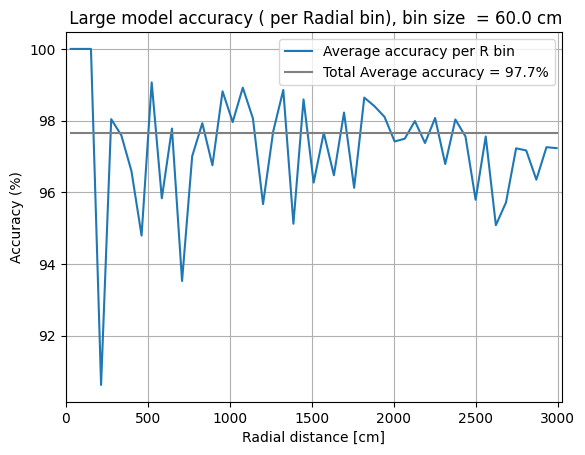

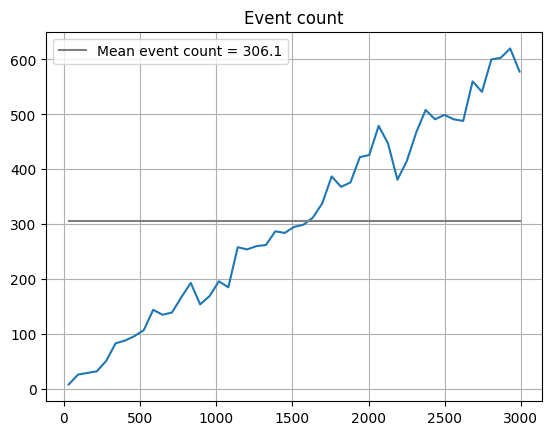

In [117]:

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return rho, phi

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y 

targets_scaled = targets*mean_scale['targets']['scale'][:4].numpy()+mean_scale['targets']['mean'][:4].numpy()
recons_scaled = outputs_targets*mean_scale['targets']['scale'][:4].numpy()+mean_scale['targets']['mean'][:4].numpy()


rho_recons, phi_recons = cart2pol(x_recons, y_recons)
rho_target, phi_target = cart2pol(x_target, y_target)


outreg1 = []
labelsreg1 = []
outreg2 = []
labelsreg2 = []
outreg3 = []
labelsreg3 = []
outreg4 = []
labelsreg4 = []
outreg5 = []
labelsreg5 = []
outreg6 = []
labelsreg6 = []

for i in range(len(rho_target)):
    if rho_target[i]<500:
        outreg1.append(outputs_class[i,1])
        labelsreg1.append(labels[i])
    elif 500< rho_target[i] <= 1000:
        outreg2.append(outputs_class[i,1])
        labelsreg2.append(labels[i])
    elif 1000< rho_target[i] <=1500:
        outreg3.append(outputs_class[i,1])
        labelsreg3.append(labels[i])
    elif 1500< rho_target[i]<= 2000:
        outreg4.append(outputs_class[i,1])
        labelsreg4.append(labels[i])
    elif 2000< rho_target[i] <= 2500:
        outreg5.append(outputs_class[i,1])
        labelsreg5.append(labels[i])
    elif rho_target[i]>2500:
        outreg6.append(outputs_class[i,1])
        labelsreg6.append(labels[i])

accreg1 = accuracy_calc(torch.tensor(np.array(outreg1)), torch.tensor(labelsreg1))
accreg2 = accuracy_calc(torch.tensor(np.array(outreg2)), torch.tensor(labelsreg2))
accreg3 = accuracy_calc(torch.tensor(np.array(outreg3)), torch.tensor(labelsreg3))
accreg4 = accuracy_calc(torch.tensor(np.array(outreg4)), torch.tensor(labelsreg4))
accreg5 = accuracy_calc(torch.tensor(np.array(outreg5)), torch.tensor(labelsreg5))
accreg6 = accuracy_calc(torch.tensor(np.array(outreg6)), torch.tensor(labelsreg6))

print('Accuracy (0->500cm radius): {:.1f} %'.format(accreg1*100.))
print('Accuracy (500->1000cm radius): {:.1f} %'.format(accreg2*100.))
print('Accuracy (1000->1500cm radius): {:.1f} %'.format(accreg3*100.))
print('Accuracy (1500->2000cm radius): {:.1f} %'.format(accreg4*100.))
print('Accuracy (2000->2500cm radius): {:.1f} %'.format(accreg5*100.))
print('Accuracy (2500->3000cm radius): {:.1f} %'.format(accreg6*100.))



#different method


bins = np.linspace(0, max(rho_target), 50)  


bin_indices = np.digitize(rho_target, bins)


split_radii = {i: [] for i in range(len(bins)-1)}
split_out = {i: [] for i in range(len(bins)-1)}
split_label = {i: [] for i in range(len(bins)-1)}


for i, bin_idx in enumerate(bin_indices):
    if 0 < bin_idx < len(bins):  
        split_radii[bin_idx-1].append(rho_target[i])
        split_out[bin_idx-1].append(outputs_class[i, 1])
        split_label[bin_idx-1].append(labels[i])


split_radii = {k: np.array(v) for k, v in split_radii.items()}
split_out = {k: np.array(v) for k, v in split_out.items()}
split_labels = {k: np.array(v) for k, v in split_label.items()}


acc_split = []
xplot = []
ymean = []
rnums = []
for k in split_radii:
    acc_split.append(accuracy_calc(torch.tensor(split_out[k]), torch.tensor(split_labels[k]))*100)
    xplot.append((bins[k]+bins[k+1])/2)
    ymean.append(acc*100)
    rnums.append(len(split_radii[k]))
    #print(f"Accuracy in region R = {np.round(bins[k])} - {np.round(bins[k+1])}cm: {np.round(acc_split[k])}%")

plt.plot(xplot, acc_split, label = 'Average accuracy per R bin')
plt.plot(xplot, ymean, color = 'grey', label = 'Total Average accuracy = {:.1f}%'.format(acc*100))
plt.xlim(0, max(rho_target))
plt.ylabel("Accuracy (%)")
plt.xlabel("Radial distance [cm]")
plt.legend()
plt.title(f" Large model accuracy ( per Radial bin), bin size  = {np.round(max(rho_target)/50)} cm")
plt.grid()
plt.show()

rnums_mean = sum(rnums) / len(rnums)
rnums_array = [rnums_mean] * len(rnums)

plt.plot(xplot, rnums)
plt.plot(xplot, rnums_array, color = 'grey', label = 'Mean event count = {:.1f}'.format(rnums_mean))
plt.title("Event count")
plt.legend()
plt.grid()
plt.show()

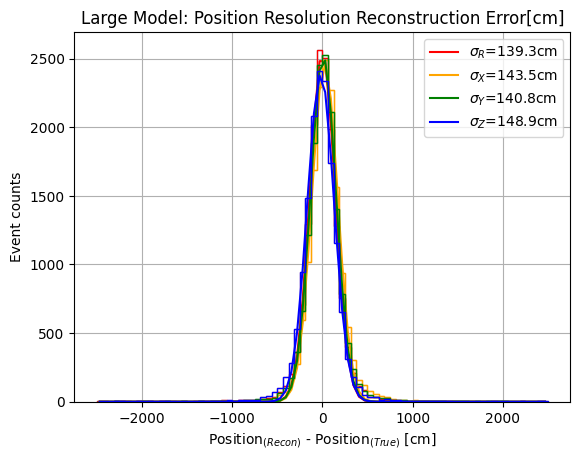

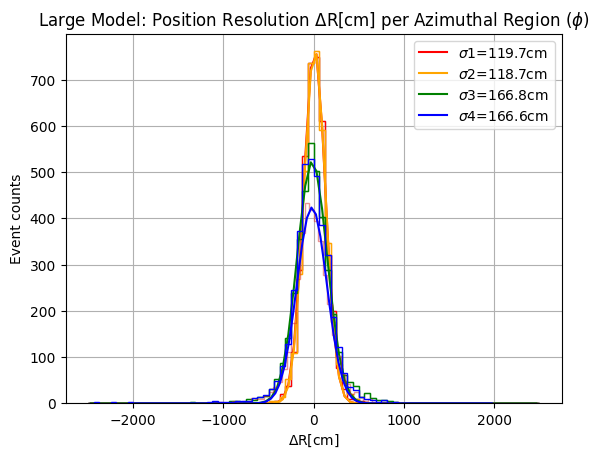

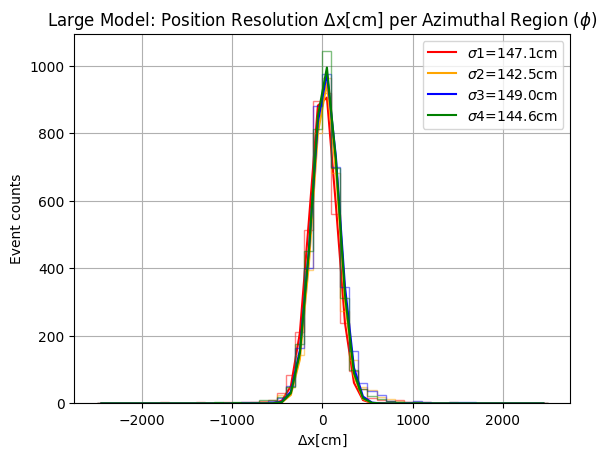

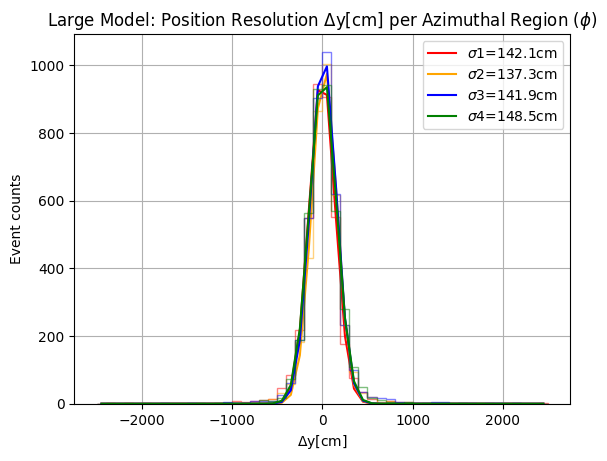

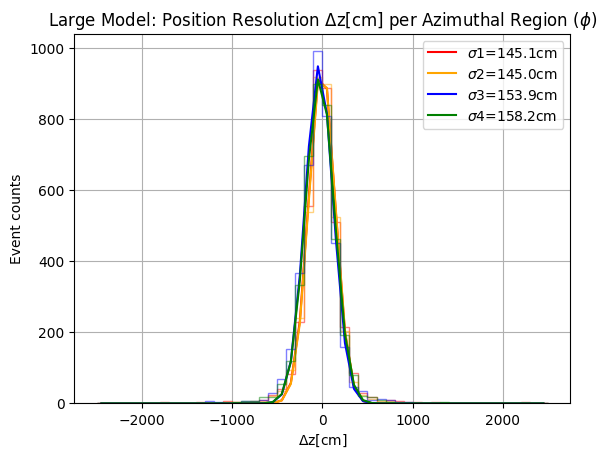

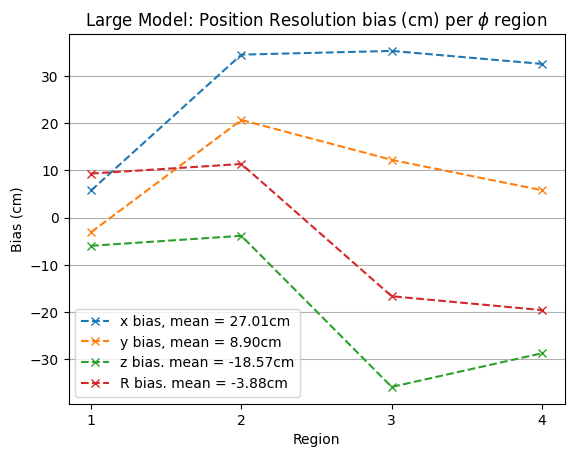

X bias per region: [ 6. 34. 35. 33.]
Y bias per region: [ 6. 34. 35. 33.]
Z bias per region: [ -6.  -4. -36. -29.]
Mean X bias: 27.008323524946494
Mean Y bias: 10.445435099398036
Mean Z bias: 18.57243860387494


NameError: name 'Hello' is not defined

In [116]:

phi_regions = [(-np.pi, -np.pi/2),(-np.pi/2, 0), (0, np.pi/2), (np.pi/2, np.pi)]

diff = recons_scaled[:, 1:]-targets_scaled[:,1:]
xdiff = diff[:,0]
ydiff = diff[:,1]
zdiff = diff[:,2]
posR_true, phoPhi_true = cart2pol(targets_scaled[:,1], targets_scaled[:,2])
posR_recon, posPhi_recon = cart2pol(recons_scaled[:,1], recons_scaled[:,2])

posR_diff = posR_recon - posR_true

hist_delPhi_R = plt.hist(posR_diff, bins=80, range = [-2500,2500], histtype = 'step', lw=2, alpha = 0.5)
x_hist_delPhi_R = (hist_delPhi_R[1][1:]+hist_delPhi_R[1][0:-1])/2
y_hist_delPhi_R = hist_delPhi_R[0]
Rp0 = [y_hist_delPhi_R.max(), posR_diff.mean(), posR_diff.std()]
Rp, Rpcov = curve_fit(gaussian, x_hist_delPhi_R, y_hist_delPhi_R, p0 = Rp0)
Rfit = gaussian(x_hist_delPhi_R, Rp[0], Rp[1], Rp[2])
Rlabel=f'$\sigma_R$={np.round(Rp[2], 1)}cm'
plt.plot(x_hist_delPhi_R, Rfit, label=Rlabel, color = 'red')
plt.hist(posR_diff, bins = 80, range=[-2500, 2500], histtype = 'step', color = 'red', lw = 2)

hist_delPhi_x = plt.hist(xdiff, bins=80, range = [-2500,2500], histtype = 'step', lw=2, alpha = 0.5)
x_hist_delPhi_x = (hist_delPhi_x[1][1:]+hist_delPhi_x[1][0:-1])/2
y_hist_delPhi_x = hist_delPhi_x[0]
xp0 = [y_hist_delPhi_x.max(), xdiff.mean(), xdiff.std()]
xp, xpcov = curve_fit(gaussian, x_hist_delPhi_x, y_hist_delPhi_x, p0 = xp0)
xfit = gaussian(x_hist_delPhi_x, xp[0], xp[1], xp[2])
xlabel=f'$\sigma_X$={np.round(xp[2], 1)}cm'
plt.plot(x_hist_delPhi_x, xfit, label=xlabel, color = 'orange')
plt.hist(distance[:,0], bins = 80, range = [-2500,2500], color = 'orange', histtype = 'step', lw=2)


hist_delPhi_y = plt.hist(ydiff, bins=80, range = [-2500,2500], histtype = 'step', lw=2, alpha = 0.5)
x_hist_delPhi_y = (hist_delPhi_y[1][1:]+hist_delPhi_y[1][0:-1])/2
y_hist_delPhi_y = hist_delPhi_y[0]
yp0 = [y_hist_delPhi_y.max(), ydiff.mean(), ydiff.std()]
yp, ypcov = curve_fit(gaussian, x_hist_delPhi_y, y_hist_delPhi_y, p0 = yp0)
yfit = gaussian(x_hist_delPhi_y, yp[0], yp[1], yp[2])
ylabel=f'$\sigma_Y$={np.round(yp[2], 1)}cm'
plt.plot(x_hist_delPhi_y, yfit, label=ylabel, color = 'green')
plt.hist(distance[:,1], bins = 80, range = [-2500,2500], histtype = 'step', lw=2, color = 'green')


hist_delPhi_z = plt.hist(zdiff, bins=80, range = [-2500,2500], histtype = 'step', lw=2, alpha = 0.5)
x_hist_delPhi_z = (hist_delPhi_z[1][1:]+hist_delPhi_z[1][0:-1])/2
y_hist_delPhi_z = hist_delPhi_z[0]
zp0 = [y_hist_delPhi_z.max(), zdiff.mean(), zdiff.std()]
zp, zpcov = curve_fit(gaussian, x_hist_delPhi_z, y_hist_delPhi_z, p0 = zp0)
zfit = gaussian(x_hist_delPhi_z, zp[0], zp[1], zp[2])
zlabel=f'$\sigma_Z$={np.round(zp[2], 1)}cm'
plt.plot(x_hist_delPhi_z, zfit, label=zlabel, color = 'blue')
plt.hist(distance[:,2], bins = 80, range = [-2500,2500], color = 'blue', histtype = 'step', lw=2)
#plt.yscale('log')
plt.xlabel(r'Position$_{(Recon)}$ - Position$_{(True)}$ [cm]')
plt.ylabel('Event counts')
plt.title('Large Model: Position Resolution Reconstruction Error[cm]')
plt.legend()
plt.grid()
plt.show()


posR_true_Reg1, posR_true_Reg2, posR_true_Reg3, posR_true_Reg4 = np.split(posR_true, 4)
posR_recon_Reg1, posR_recon_Reg2, posR_recon_Reg3, posR_recon_Reg4 = np.split(posR_recon, 4)

posR_diff_Reg1 = posR_recon_Reg1 - posR_true_Reg1
posR_diff_Reg2 = posR_recon_Reg2 - posR_true_Reg2
posR_diff_Reg3 = posR_recon_Reg3 - posR_true_Reg3
posR_diff_Reg4 = posR_recon_Reg4 - posR_true_Reg4

posPhi_true_Reg1, posPhi_true_Reg2, posPhi_true_Reg3, posPhi_true_Reg4 = np.split(posPhi_true, 4)
posPhi_recon_Reg1, posPhi_recon_Reg2, posPhi_recon_Reg3, posPhi_recon_Reg4 = np.split(posPhi_recon, 4)

yrbias = []

    
hist_delPhi_R1 = plt.hist(posR_diff_Reg1, bins=80, range = [-2500,2500], histtype = 'step', lw=2, alpha = 0.5)
x_hist_delPhi_R1 = (hist_delPhi_R1[1][1:]+hist_delPhi_R1[1][0:-1])/2
y_hist_delPhi_R1 = hist_delPhi_R1[0]
R1p0 = [y_hist_delPhi_R1.max(), posR_diff_Reg1.mean(), posR_diff_Reg1.std()]
R1p, R1pcov = curve_fit(gaussian, x_hist_delPhi_R1, y_hist_delPhi_R1, p0 = R1p0)
R1fit = gaussian(x_hist_delPhi_R1, R1p[0], R1p[1], R1p[2])
R1label=f'$\sigma{1}$={np.round(R1p[2], 1)}cm'
plt.plot(x_hist_delPhi_R1, R1fit, label=R1label, color = 'red')
plt.hist(posR_diff_Reg1, bins=80, range = [-2500,2500], color = 'red', histtype = 'step', lw=2)
R1max = R1p[1]
hist_delPhi_R2 = plt.hist(posR_diff_Reg2, bins=80, range = [-2500,2500], histtype = 'step', lw=2, alpha = 0.5)
x_hist_delPhi_R2 = (hist_delPhi_R2[1][1:]+hist_delPhi_R2[1][0:-1])/2
y_hist_delPhi_R2 = hist_delPhi_R2[0]
R2p0 = [y_hist_delPhi_R2.max(), posR_diff_Reg2.mean(), posR_diff_Reg2.std()]
R2p, R2pcov = curve_fit(gaussian, x_hist_delPhi_R2, y_hist_delPhi_R2, p0 = R2p0)
R2fit = gaussian(x_hist_delPhi_R2, R2p[0], R2p[1], R2p[2])
R2label=f'$\sigma{2}$={np.round(R2p[2], 1)}cm'
plt.plot(x_hist_delPhi_R2, R2fit, label=R2label, color = 'orange')
plt.hist(posR_diff_Reg2, bins=80, range = [-2500,2500], histtype = 'step', lw=2, color = 'orange')
R2max = R2p[1]
hist_delPhi_R3 = plt.hist(posR_diff_Reg3, bins=80, range = [-2500,2500], histtype = 'step', lw=2, alpha = 0.5)
x_hist_delPhi_R3 = (hist_delPhi_R3[1][1:]+hist_delPhi_R3[1][0:-1])/2
y_hist_delPhi_R3 = hist_delPhi_R3[0]
R3p0 = [y_hist_delPhi_R3.max(), posR_diff_Reg3.mean(), posR_diff_Reg3.std()]
R3p, R3pcov = curve_fit(gaussian, x_hist_delPhi_R3, y_hist_delPhi_R3, p0 = R3p0)
R3fit = gaussian(x_hist_delPhi_R3, R3p[0], R3p[1], R3p[2])
R3label=f'$\sigma{3}$={np.round(R3p[2], 1)}cm'
plt.plot(x_hist_delPhi_R3, R3fit, label=R3label, color = 'green')
plt.hist(posR_diff_Reg3, bins=80, range = [-2500,2500], histtype = 'step', lw=2, color = 'green')
R3max = R3p[1]
hist_delPhi_R4 = plt.hist(posR_diff_Reg4, bins=80, range = [-2000,2000], histtype = 'step', lw=2, alpha = 0.5)
x_hist_delPhi_R4 = (hist_delPhi_R4[1][1:]+hist_delPhi_R4[1][0:-1])/2
y_hist_delPhi_R4 = hist_delPhi_R4[0]
R4p0 = [y_hist_delPhi_R4.max(), posR_diff_Reg4.mean(), posR_diff_Reg4.std()]
R4p, R4pcov = curve_fit(gaussian, x_hist_delPhi_R4, y_hist_delPhi_R4, p0 = R4p0)
R4fit = gaussian(x_hist_delPhi_R4, R4p[0], R4p[1], R4p[2])
R4label=f'$\sigma{4}$={np.round(R4p[2], 1)}cm'
R4max = R4p[1]
plt.plot(x_hist_delPhi_R4, R4fit, label=R4label, color = 'blue')
plt.hist(posR_diff_Reg4, bins=80, range = [-2500,2500], histtype = 'step', lw=2, color = 'blue')
plt.legend()
plt.xlabel(r'$\Delta$R[cm]')
plt.ylabel('Event counts')
plt.title('Large Model: Position Resolution $\Delta$R[cm] per Azimuthal Region ($\phi$)')
plt.grid()
plt.show()


yrbias.append(R1p[1])
yrbias.append(R2p[1])
yrbias.append(R3p[1])
yrbias.append(R4p[1])

dx = x_recons - x_target
dy = y_recons - y_target
dz = z_recons - z_target

yxbias = []
yybias = []
yzbias = []

phi_binned_data = []
for phi_min, phi_max in phi_regions:
    mask = (posPhi_recon >= phi_min) & (posPhi_recon < phi_max)
    phi_binned_data.append((dx[mask], dy[mask], dz[mask]))

PHI = []
sigma_Phix = []
sigma_Phiy = []
sigma_Phiz = []

color = ['red', 'orange', 'blue', 'green']
for i, (phi_min, phi_max) in enumerate(phi_regions):
    dx_bin, dy_bin, dz_bin = phi_binned_data[i]
    PHI.append((phi_min+phi_max)/2)
    hist_delPhi_x = plt.hist(dx_bin, bins=50, range = [-2500, 2500], alpha = 0.5, histtype='step', lw=2, color = color[i])
    x_hist_delPhi_x = (hist_delPhi_x[1][1:]+hist_delPhi_x[1][0:-1])/2
    y_hist_delPhi_x = hist_delPhi_x[0]
    xp0 = [y_hist_delPhi_x.max(), xdiff.mean(), xdiff.std()]
    xp, xpcov = curve_fit(gaussian, x_hist_delPhi_x, y_hist_delPhi_x, p0 = xp0)
    xfit = gaussian(x_hist_delPhi_x, xp[0], xp[1], xp[2])
    xlabel = f'$\sigma{i+1}$={np.round(xp[2], 1)}cm' #, {(np.round(phi_min,2), np.round(phi_max,2))}'
    sigma_Phix.append(xp[2])
    yxbias.append(xp[1])
    plt.plot(x_hist_delPhi_x, xfit, label=xlabel, color = color[i])

plt.title(f'Large Model: Position Resolution $\Delta$x[cm] per Azimuthal Region ($\phi$)')
plt.xlabel(r'$\Delta$x[cm]')
plt.ylabel('Event counts')
plt.legend()
leg = plt.legend( loc = 'upper right')
plt.grid()
plt.show()
    

for i, (phi_min, phi_max) in enumerate(phi_regions):
    dx_bin, dy_bin, dz_bin = phi_binned_data[i]
    PHI.append((phi_min+phi_max)/2)
    hist_delPhi_y = plt.hist(dy_bin, bins=50, range = [-2500, 2500], alpha = 0.5, histtype='step', lw=2, color = color[i])
    x_hist_delPhi_y = (hist_delPhi_y[1][1:]+hist_delPhi_y[1][0:-1])/2
    y_hist_delPhi_y = hist_delPhi_y[0]
    yp0 = [y_hist_delPhi_y.max(), ydiff.mean(), ydiff.std()]
    yp, ypcov = curve_fit(gaussian, x_hist_delPhi_y, y_hist_delPhi_y, p0 = yp0)
    yfit = gaussian(x_hist_delPhi_y, yp[0], yp[1], yp[2])
    ylabel = f'$\sigma{i+1}$={np.round(yp[2], 1)}cm' #, {(np.round(phi_min,2), np.round(phi_max,2))}'
    sigma_Phix.append(yp[2])
    yybias.append(yp[1])
    plt.plot(x_hist_delPhi_y, yfit, label=ylabel, color = color[i])

plt.title(f'Large Model: Position Resolution $\Delta$y[cm] per Azimuthal Region ($\phi$)')
plt.xlabel(r'$\Delta$y[cm]')
plt.ylabel('Event counts')
plt.legend()
leg = plt.legend( loc = 'upper right')
plt.grid()
plt.show()

for i, (phi_min, phi_max) in enumerate(phi_regions):
    dx_bin, dy_bin, dz_bin = phi_binned_data[i]
    PHI.append((phi_min+phi_max)/2)
    hist_delPhi_z = plt.hist(dz_bin, bins=50, range = [-2500, 2500], alpha = 0.5, histtype='step', lw=2, color = color[i])
    x_hist_delPhi_z = (hist_delPhi_z[1][1:]+hist_delPhi_z[1][0:-1])/2
    y_hist_delPhi_z = hist_delPhi_z[0]
    zp0 = [y_hist_delPhi_z.max(), zdiff.mean(), zdiff.std()]
    zp, xpcov = curve_fit(gaussian, x_hist_delPhi_z, y_hist_delPhi_z, p0 = zp0)
    zfit = gaussian(x_hist_delPhi_z, zp[0], zp[1], zp[2])
    zlabel = f'$\sigma{i+1}$={np.round(zp[2], 1)}cm' #, {(np.round(phi_min,2), np.round(phi_max,2))}'
    sigma_Phiz.append(zp[2])
    yzbias.append(zp[1])
    plt.plot(x_hist_delPhi_z, zfit, label=zlabel, color = color[i])

plt.title(f'Large Model: Position Resolution $\Delta$z[cm] per Azimuthal Region ($\phi$)')
plt.xlabel(r'$\Delta$z[cm]')
plt.ylabel('Event counts')
plt.legend()
leg = plt.legend( loc = 'upper right')
plt.grid()
plt.show()


phi_regions_graph = [1, 2, 3, 4]

phi_regions

yxbias_mean = sum(yxbias) / len(yxbias)
yybias_mean = sum(yybias) / len(yybias)
yzbias_mean = sum(yzbias) / len(yzbias)

yrbias_mean = sum(yrbias) / len(yrbias)


plt.plot(phi_regions_graph, yxbias, label = f'x bias, mean = {yxbias_mean:.2f}cm', linestyle = 'dashed', marker = 'x')
plt.plot(phi_regions_graph, yybias, label = f'y bias, mean = {yybias_mean:.2f}cm', linestyle = 'dashed', marker = 'x')
plt.plot(phi_regions_graph, yzbias, label = f'z bias. mean = {yzbias_mean:.2f}cm', linestyle = 'dashed', marker = 'x')
plt.plot(phi_regions_graph, yrbias, label = f'R bias. mean = {yrbias_mean:.2f}cm', linestyle = 'dashed', marker = 'x')
plt.xticks([1, 2, 3, 4])
plt.xlabel(phi_regions)
plt.xlabel('Region')
plt.ylabel('Bias (cm)')
plt.grid(axis = 'y')
plt.title(f'Large Model: Position Resolution bias (cm) per $\phi$ region')
plt.legend()
plt.show()


#print('R bias per region: {}'.format(np.round(R)))
print('X bias per region: {}'.format(np.round(yxbias)))
print('Y bias per region: {}'.format(np.round(yxbias)))
print('Z bias per region: {}'.format(np.round(yzbias)))

#print('Mean R bias: {}'.format(np.mean(np.abs(R))))
print('Mean X bias: {}'.format(np.mean(np.abs(yxbias))))
print('Mean Y bias: {}'.format(np.mean(np.abs(yybias))))
print('Mean Z bias: {}'.format(np.mean(np.abs(yzbias))))


Hello

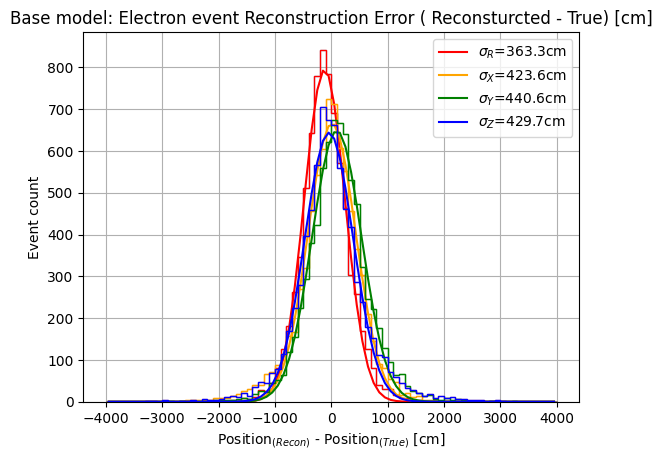

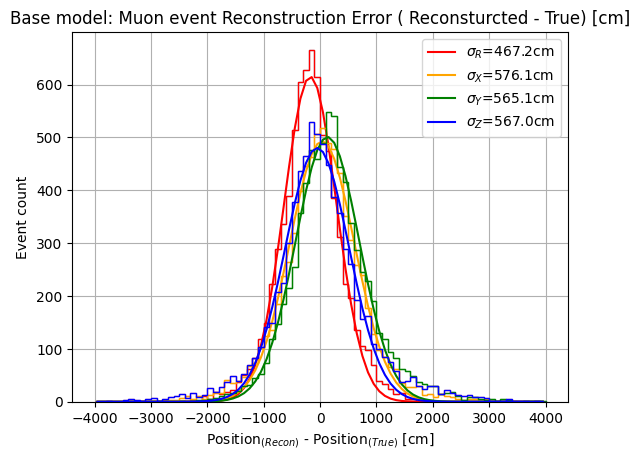

In [ ]:
def R(recons_scaled, targets_scaled, particle):
    distance = recons_scaled[:, 1:]-targets_scaled[:,1:]
    xdiff = distance[:,0]
    ydiff = distance[:,1]
    zdiff = distance[:,2]
    posR_true, phoPhi_true = cart2pol(targets_scaled[:,1], targets_scaled[:,2])
    posR_recon, posPhi_recon = cart2pol(recons_scaled[:,1], recons_scaled[:,2])

    posR_diff = posR_recon - posR_true
    #posPhi_diff = posPhi_recon - posPhi_true

    #zp0 = [y_hist_delPhi_z.max(), zdiff.mean(), zdiff.std()]
    #zp, zpcov = curve_fit(gaussian, x_hist_delPhi_z, y_hist_delPhi_z, p0=zp0)
    #zfit = gaussian(x_hist_delPhi_z, zp[0], zp[1], zp[2])


    hist_delPhi_R = plt.hist(posR_diff, bins=80, range = [-4000,4000], histtype = 'step', lw=2, alpha = 0.5)
    x_hist_delPhi_R = (hist_delPhi_R[1][1:]+hist_delPhi_R[1][0:-1])/2
    y_hist_delPhi_R = hist_delPhi_R[0]
    Rp0 = [y_hist_delPhi_R.max(), posR_diff.mean(), posR_diff.std()]
    Rp, Rpcov = curve_fit(gaussian, x_hist_delPhi_R, y_hist_delPhi_R, p0 = Rp0)
    Rfit = gaussian(x_hist_delPhi_R, Rp[0], Rp[1], Rp[2])
    Rlabel=f'$\sigma_R$={np.round(Rp[2], 1)}cm'
    plt.plot(x_hist_delPhi_R, Rfit, label=Rlabel, color = 'red')
    plt.hist(posR_diff, bins = 80, range=[-4000, 4000], histtype = 'step', color = 'red', lw = 2)

    hist_delPhi_x = plt.hist(xdiff, bins=80, range = [-4000,4000], histtype = 'step', lw=2, alpha = 0.5)
    x_hist_delPhi_x = (hist_delPhi_x[1][1:]+hist_delPhi_x[1][0:-1])/2
    y_hist_delPhi_x = hist_delPhi_x[0]
    xp0 = [y_hist_delPhi_x.max(), xdiff.mean(), xdiff.std()]
    xp, xpcov = curve_fit(gaussian, x_hist_delPhi_x, y_hist_delPhi_x, p0 = xp0)
    xfit = gaussian(x_hist_delPhi_x, xp[0], xp[1], xp[2])
    xlabel=f'$\sigma_X$={np.round(xp[2], 1)}cm'
    plt.plot(x_hist_delPhi_x, xfit, label=xlabel, color = 'orange')
    plt.hist(distance[:,0], bins = 80, range = [-4000,4000], color = 'orange', histtype = 'step', lw=2)


    hist_delPhi_y = plt.hist(ydiff, bins=80, range = [-4000,4000], histtype = 'step', lw=2, alpha = 0.5)
    x_hist_delPhi_y = (hist_delPhi_y[1][1:]+hist_delPhi_y[1][0:-1])/2
    y_hist_delPhi_y = hist_delPhi_y[0]
    yp0 = [y_hist_delPhi_y.max(), ydiff.mean(), ydiff.std()]
    yp, ypcov = curve_fit(gaussian, x_hist_delPhi_y, y_hist_delPhi_y, p0 = yp0)
    yfit = gaussian(x_hist_delPhi_y, yp[0], yp[1], yp[2])
    ylabel=f'$\sigma_Y$={np.round(yp[2], 1)}cm'
    plt.plot(x_hist_delPhi_y, yfit, label=ylabel, color = 'green')
    plt.hist(distance[:,1], bins = 80, range = [-4000,4000], histtype = 'step', lw=2, color = 'green')


    hist_delPhi_z = plt.hist(zdiff, bins=80, range = [-4000,4000], histtype = 'step', lw=2, alpha = 0.5)
    x_hist_delPhi_z = (hist_delPhi_z[1][1:]+hist_delPhi_z[1][0:-1])/2
    y_hist_delPhi_z = hist_delPhi_z[0]
    zp0 = [y_hist_delPhi_z.max(), zdiff.mean(), zdiff.std()]
    zp, zpcov = curve_fit(gaussian, x_hist_delPhi_z, y_hist_delPhi_z, p0 = zp0)
    zfit = gaussian(x_hist_delPhi_z, zp[0], zp[1], zp[2])
    zlabel=f'$\sigma_Z$={np.round(zp[2], 1)}cm'
    plt.plot(x_hist_delPhi_z, zfit, label=zlabel, color = 'blue')
    plt.hist(distance[:,2], bins = 80, range = [-4000,4000], color = 'blue', histtype = 'step', lw=2)
    #plt.yscale('log')
    plt.ylabel('Event count')
    plt.xlabel(r'Position$_{(Recon)}$ - Position$_{(True)}$ [cm]')
    plt.title(f'Base model: {particle} event Reconstruction Error ( Reconsturcted - True) [cm]')
    plt.legend()
    plt.grid()
    plt.show()


erecons_scaled = recons_scaled[eevents]
etargets_scaled = targets_scaled[eevents]
eparticle = 'Electron'

mrecons_scaled = recons_scaled[mevents]
mtargets_scaled = targets_scaled[mevents]
mparticle = 'Muon'

R(erecons_scaled, etargets_scaled, eparticle)
R(mrecons_scaled, mtargets_scaled, mparticle)


Electron Accuracy (0->500cm radius): 88.7 %
Electron Accuracy (500->1000cm radius): 90.2 %
Electron Accuracy (1000->1500cm radius): 89.2 %
Electron Accuracy (1500->2000cm radius): 88.0 %
Electron Accuracy (2000->2500cm radius): 87.9 %
Electron Accuracy (2500->3000cm radius): 83.3 %


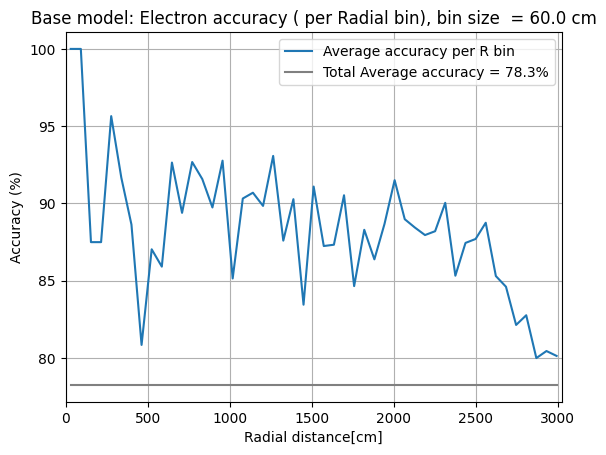

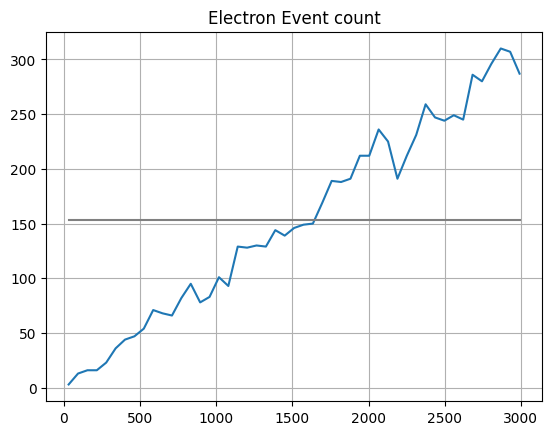

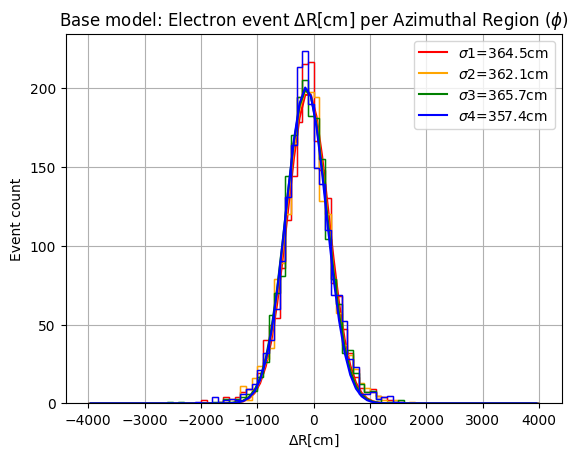

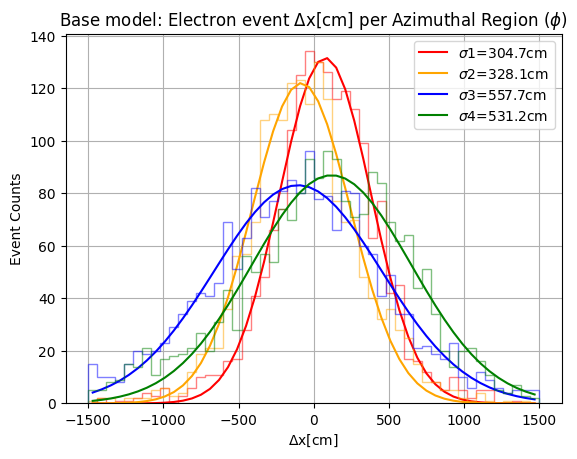

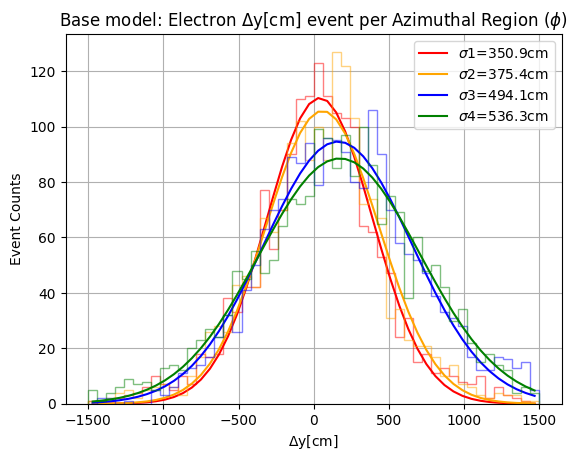

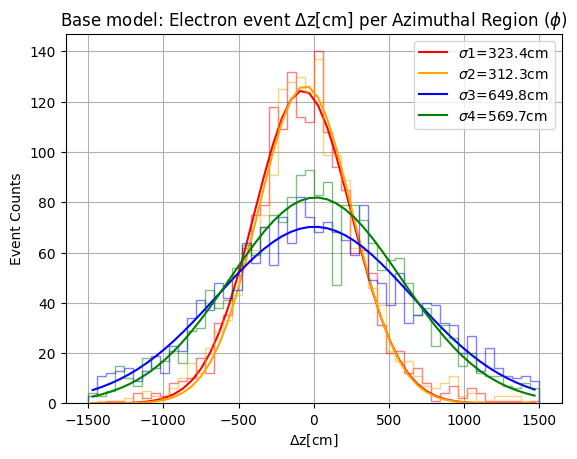

Muon Accuracy (0->500cm radius): 87.3 %
Muon Accuracy (500->1000cm radius): 84.3 %
Muon Accuracy (1000->1500cm radius): 86.1 %
Muon Accuracy (1500->2000cm radius): 86.3 %
Muon Accuracy (2000->2500cm radius): 87.8 %
Muon Accuracy (2500->3000cm radius): 87.4 %


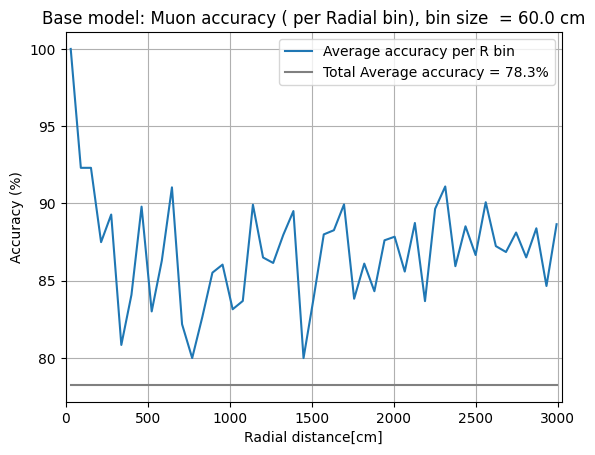

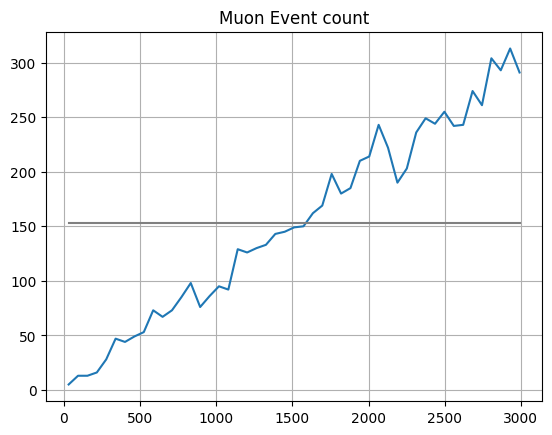

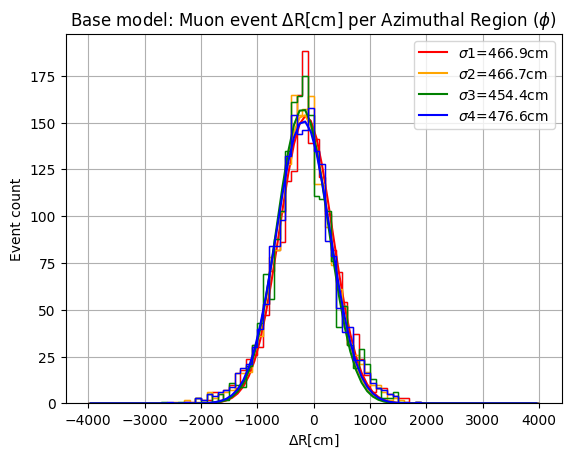

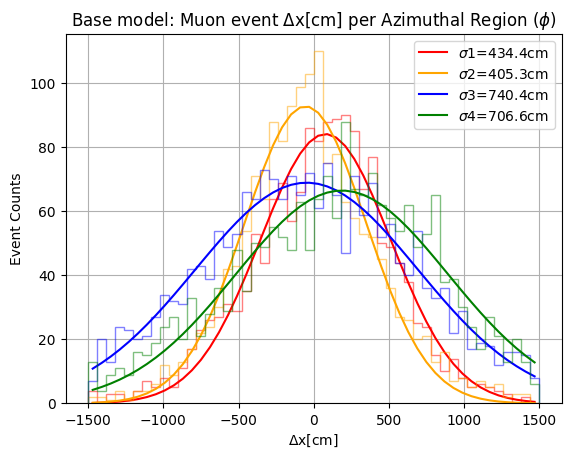

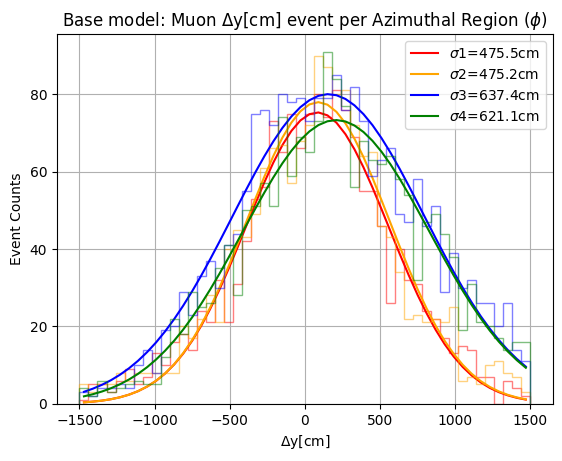

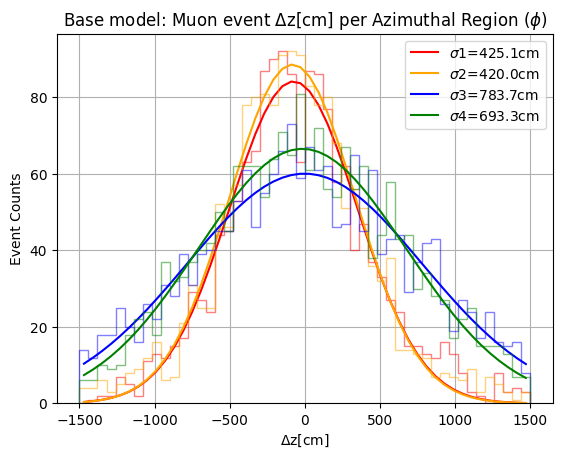

In [ ]:
def Recon_pos_part2(recons_scaled ,targets_scaled, type):

    x_recons, x_target = recons_scaled[:,1], targets_scaled[:,1]
    y_recons, y_target = recons_scaled[:,2], targets_scaled[:,2]
    z_recons, z_target = recons_scaled[:,3], targets_scaled[:,3]
    posR_true, posPhi_true = cart2pol(targets_scaled[:,1], targets_scaled[:,2])
    posR_recon, posPhi_recon = cart2pol(recons_scaled[:,1], recons_scaled[:,2])

    rho_recons, phi_recons = cart2pol(x_recons, y_recons)
    rho_target, phi_target = cart2pol(x_target, y_target)
    
    outreg1 = []
    labelsreg1 = []
    outreg2 = []
    labelsreg2 = []
    outreg3 = []
    labelsreg3 = []
    outreg4 = []
    labelsreg4 = []
    outreg5 = []
    labelsreg5 = []
    outreg6 = []
    labelsreg6 = []

    for i in range(len(rho_target)):
        if rho_target[i]<500:
            outreg1.append(outputs_class[i,1])
            labelsreg1.append(labels[i])
        elif 500< rho_target[i] <= 1000:
            outreg2.append(outputs_class[i,1])
            labelsreg2.append(labels[i])
        elif 1000< rho_target[i] <=1500:
            outreg3.append(outputs_class[i,1])
            labelsreg3.append(labels[i])
        elif 1500< rho_target[i]<= 2000:
            outreg4.append(outputs_class[i,1])
            labelsreg4.append(labels[i])
        elif 2000< rho_target[i] <= 2500:
            outreg5.append(outputs_class[i,1])
            labelsreg5.append(labels[i])
        elif rho_target[i]>2500:
            outreg6.append(outputs_class[i,1])
            labelsreg6.append(labels[i])


    accreg1 = accuracy_calc(torch.tensor(np.array(outreg1)), torch.tensor(labelsreg1))
    accreg2 = accuracy_calc(torch.tensor(np.array(outreg2)), torch.tensor(labelsreg2))
    accreg3 = accuracy_calc(torch.tensor(np.array(outreg3)), torch.tensor(labelsreg3))
    accreg4 = accuracy_calc(torch.tensor(np.array(outreg4)), torch.tensor(labelsreg4))
    accreg5 = accuracy_calc(torch.tensor(np.array(outreg5)), torch.tensor(labelsreg5))
    accreg6 = accuracy_calc(torch.tensor(np.array(outreg6)), torch.tensor(labelsreg6))
    print(type, 'Accuracy (0->500cm radius): {:.1f} %'.format(accreg1*100.))
    print(type, 'Accuracy (500->1000cm radius): {:.1f} %'.format(accreg2*100.))
    print(type, 'Accuracy (1000->1500cm radius): {:.1f} %'.format(accreg3*100.))
    print(type, 'Accuracy (1500->2000cm radius): {:.1f} %'.format(accreg4*100.))
    print(type, 'Accuracy (2000->2500cm radius): {:.1f} %'.format(accreg5*100.))
    print(type, 'Accuracy (2500->3000cm radius): {:.1f} %'.format(accreg6*100.))
    
    #different method


    bins = np.linspace(0, max(rho_target), 50)  
    bin_indices = np.digitize(rho_target, bins)
    split_radii = {i: [] for i in range(len(bins)-1)}
    split_out = {i: [] for i in range(len(bins)-1)}
    split_label = {i: [] for i in range(len(bins)-1)}
    
    for i, bin_idx in enumerate(bin_indices):
        if 0 < bin_idx < len(bins):  
            split_radii[bin_idx-1].append(rho_target[i])
            split_out[bin_idx-1].append(outputs_class[i, 1])
            split_label[bin_idx-1].append(labels[i])
            
    split_radii = {k: np.array(v) for k, v in split_radii.items()}
    split_out = {k: np.array(v) for k, v in split_out.items()}
    split_labels = {k: np.array(v) for k, v in split_label.items()}
    
    acc_split = []
    xplot = []
    ymean = []
    rnums = []
    
    for k in split_radii:
        acc_split.append(accuracy_calc(torch.tensor(split_out[k]), torch.tensor(split_labels[k]))*100)
        xplot.append((bins[k]+bins[k+1])/2)
        ymean.append(acc*100)
        rnums.append(len(split_radii[k]))
        #print(f"Accuracy in region R = {np.round(bins[k])} - {np.round(bins[k+1])}cm: {np.round(acc_split[k])}%")
    
    plt.plot(xplot, acc_split, label = 'Average accuracy per R bin')
    plt.plot(xplot, ymean,  color = 'grey', label = 'Total Average accuracy = {:.1f}%'.format(acc*100))
    plt.xlim(0, max(rho_target))
    plt.ylabel("Accuracy (%)")
    plt.xlabel("Radial distance[cm]")
    plt.legend()
    plt.title(f"Base model: {type} accuracy ( per Radial bin), bin size  = {np.round(max(rho_target)/50)} cm")
    plt.grid()
    plt.show()

    rnums_mean = sum(rnums)/len(rnums)
    rnums_array = [rnums_mean]*len(rnums)

    plt.plot(xplot, rnums, label= 'Event count')
    plt.plot(xplot, rnums_array, color= 'grey', label = 'Mean event count = {:.1f}'.format(rnums_mean))
    plt.title(f"{type} Event count")
    plt.grid()
    plt.show()
    
    
    distance = recons_scaled[:, 1:]-targets_scaled[:,1:]
    xdiff = distance[:,0]
    ydiff = distance[:,1]
    zdiff = distance[:,2]


    posR_true_Reg1, posR_true_Reg2, posR_true_Reg3, posR_true_Reg4 = np.split(posR_true, 4)
    posR_recon_Reg1, posR_recon_Reg2, posR_recon_Reg3, posR_recon_Reg4 = np.split(posR_recon, 4)

    posR_diff_Reg1 = posR_recon_Reg1 - posR_true_Reg1
    posR_diff_Reg2 = posR_recon_Reg2 - posR_true_Reg2
    posR_diff_Reg3 = posR_recon_Reg3 - posR_true_Reg3
    posR_diff_Reg4 = posR_recon_Reg4 - posR_true_Reg4

    posPhi_true_Reg1, posPhi_true_Reg2, posPhi_true_Reg3, posPhi_true_Reg4 = np.split(posPhi_true, 4)
    posPhi_recon_Reg1, posPhi_recon_Reg2, posPhi_recon_Reg3, posPhi_recon_Reg4 = np.split(posPhi_recon, 4)

    
    hist_delPhi_R1 = plt.hist(posR_diff_Reg1, bins=80, range = [-4000,4000], histtype = 'step', lw=2, alpha = 0.5)
    x_hist_delPhi_R1 = (hist_delPhi_R1[1][1:]+hist_delPhi_R1[1][0:-1])/2
    y_hist_delPhi_R1 = hist_delPhi_R1[0]
    R1p0 = [y_hist_delPhi_R1.max(), posR_diff_Reg1.mean(), posR_diff_Reg1.std()]
    R1p, R1pcov = curve_fit(gaussian, x_hist_delPhi_R1, y_hist_delPhi_R1, p0 = R1p0)
    R1fit = gaussian(x_hist_delPhi_R1, R1p[0], R1p[1], R1p[2])
    R1label=f'$\sigma{1}$={np.round(R1p[2], 1)}cm'
    plt.plot(x_hist_delPhi_R1, R1fit, label=R1label, color = 'red')
    plt.hist(posR_diff_Reg1, bins=80, range = [-4000,4000], color = 'red', histtype = 'step', lw=2)
    R1max = R1p[1]
    hist_delPhi_R2 = plt.hist(posR_diff_Reg2, bins=80, range = [-4000,4000], histtype = 'step', lw=2, alpha = 0.5)
    x_hist_delPhi_R2 = (hist_delPhi_R2[1][1:]+hist_delPhi_R2[1][0:-1])/2
    y_hist_delPhi_R2 = hist_delPhi_R2[0]
    R2p0 = [y_hist_delPhi_R2.max(), posR_diff_Reg2.mean(), posR_diff_Reg2.std()]
    R2p, R2pcov = curve_fit(gaussian, x_hist_delPhi_R2, y_hist_delPhi_R2, p0 = R2p0)
    R2fit = gaussian(x_hist_delPhi_R2, R2p[0], R2p[1], R2p[2])
    R2label=f'$\sigma{2}$={np.round(R2p[2], 1)}cm'
    plt.plot(x_hist_delPhi_R2, R2fit, label=R2label, color = 'orange')
    plt.hist(posR_diff_Reg2, bins=80, range = [-4000,4000], histtype = 'step', lw=2, color = 'orange')
    R2max = R2p[1]
    hist_delPhi_R3 = plt.hist(posR_diff_Reg3, bins=80, range = [-4000,4000], histtype = 'step', lw=2, alpha = 0.5)
    x_hist_delPhi_R3 = (hist_delPhi_R3[1][1:]+hist_delPhi_R3[1][0:-1])/2
    y_hist_delPhi_R3 = hist_delPhi_R3[0]
    R3p0 = [y_hist_delPhi_R3.max(), posR_diff_Reg3.mean(), posR_diff_Reg3.std()]
    R3p, R3pcov = curve_fit(gaussian, x_hist_delPhi_R3, y_hist_delPhi_R3, p0 = R3p0)
    R3fit = gaussian(x_hist_delPhi_R3, R3p[0], R3p[1], R3p[2])
    R3label=f'$\sigma{3}$={np.round(R3p[2], 1)}cm'
    plt.plot(x_hist_delPhi_R3, R3fit, label=R3label, color = 'green')
    plt.hist(posR_diff_Reg3, bins=80, range = [-4000,4000], histtype = 'step', lw=2, color = 'green')
    R3max = R3p[1]
    hist_delPhi_R4 = plt.hist(posR_diff_Reg4, bins=80, range = [-4000,4000], histtype = 'step', lw=2, alpha = 0.5)
    x_hist_delPhi_R4 = (hist_delPhi_R4[1][1:]+hist_delPhi_R4[1][0:-1])/2
    y_hist_delPhi_R4 = hist_delPhi_R4[0]
    R4p0 = [y_hist_delPhi_R4.max(), posR_diff_Reg4.mean(), posR_diff_Reg4.std()]
    R4p, R4pcov = curve_fit(gaussian, x_hist_delPhi_R4, y_hist_delPhi_R4, p0 = R4p0)
    R4fit = gaussian(x_hist_delPhi_R4, R4p[0], R4p[1], R4p[2])
    R4label=f'$\sigma{4}$={np.round(R4p[2], 1)}cm'
    R4max = R4p[1]
    plt.plot(x_hist_delPhi_R4, R4fit, label=R4label, color = 'blue')
    plt.hist(posR_diff_Reg4, bins=80, range = [-4000,4000], histtype = 'step', lw=2, color = 'blue')
    plt.legend()
    plt.xlabel('$\Delta$R[cm]')
    plt.ylabel('Event count')
    plt.title(f'Base model: {type} event $\Delta$R[cm] per Azimuthal Region ($\phi$)')
    plt.grid()
    plt.show()

    phi_regions = [(-np.pi, -np.pi/2),(-np.pi/2, 0), (0, np.pi/2), (np.pi/2, np.pi)]
    

    dx = x_recons - x_target
    dy = y_recons - y_target
    dz = z_recons - z_target

    yxbias = []
    yybias = []
    yzbias = [] 
  
    phi_binned_data = []
    for phi_min, phi_max in phi_regions:
        mask = (posPhi_recon >= phi_min) & (posPhi_recon < phi_max)
        phi_binned_data.append((dx[mask], dy[mask], dz[mask]))
        
    PHI = []
    sigma_Phix = []
    sigma_Phiy = []
    sigma_Phiz = []
    
    color = ['red', 'orange', 'blue', 'green']
    for i, (phi_min, phi_max) in enumerate(phi_regions):
        dx_bin, dy_bin, dz_bin = phi_binned_data[i]
        PHI.append((phi_min+phi_max)/2)
        hist_delPhi_x = plt.hist(dx_bin, bins=50, range = [-1500, 1500], alpha = 0.5, histtype='step', lw=2, color = color[i])
        x_hist_delPhi_x = (hist_delPhi_x[1][1:]+hist_delPhi_x[1][0:-1])/2
        y_hist_delPhi_x = hist_delPhi_x[0]
        xp0 = [y_hist_delPhi_x.max(), xdiff.mean(), xdiff.std()]
        xp, xpcov = curve_fit(gaussian, x_hist_delPhi_x, y_hist_delPhi_x, p0 = xp0)
        xfit = gaussian(x_hist_delPhi_x, xp[0], xp[1], xp[2])
        xlabel = f'$\sigma{i+1}$={np.round(xp[2], 1)}cm' 
        sigma_Phix.append(xp[2])
        yxbias.append(xp[1])
        plt.plot(x_hist_delPhi_x, xfit, label=xlabel, color = color[i])
    plt.title(f'Base model: {type} event $\Delta$x[cm] per Azimuthal Region ($\phi$)')
    plt.xlabel('$\Delta$x[cm]')
    plt.ylabel('Event Counts')
    plt.legend()
    leg = plt.legend( loc = 'upper right')
    plt.grid()
    plt.show()
    
    
    for i, (phi_min, phi_max) in enumerate(phi_regions):
        dx_bin, dy_bin, dz_bin = phi_binned_data[i]
        PHI.append((phi_min+phi_max)/2)
        hist_delPhi_y = plt.hist(dy_bin, bins=50, range = [-1500, 1500], alpha = 0.5, histtype='step', lw=2, color = color[i])
        x_hist_delPhi_y = (hist_delPhi_y[1][1:]+hist_delPhi_y[1][0:-1])/2
        y_hist_delPhi_y = hist_delPhi_y[0]
        yp0 = [y_hist_delPhi_y.max(), ydiff.mean(), ydiff.std()]
        yp, ypcov = curve_fit(gaussian, x_hist_delPhi_y, y_hist_delPhi_y, p0 = yp0)
        yfit = gaussian(x_hist_delPhi_y, yp[0], yp[1], yp[2])
        ylabel = f'$\sigma{i+1}$={np.round(yp[2], 1)}cm' #, {(np.round(phi_min,2), np.round(phi_max,2))}'
        sigma_Phiy.append(yp[2])
        yybias.append(yp[1])
        plt.plot(x_hist_delPhi_y, yfit, label=ylabel, color = color[i])     
    plt.title(f'Base model: {type} $\Delta$y[cm] event per Azimuthal Region ($\phi$)')
    plt.xlabel('$\Delta$y[cm]')
    plt.ylabel('Event Counts')
    plt.legend()
    leg = plt.legend( loc = 'upper right')
    plt.grid()
    plt.show()
    
    for i, (phi_min, phi_max) in enumerate(phi_regions):
        dx_bin, dy_bin, dz_bin = phi_binned_data[i]
        PHI.append((phi_min+phi_max)/2)
        hist_delPhi_z = plt.hist(dz_bin, bins=50, range = [-1500, 1500], alpha = 0.5, histtype='step', lw=2, color = color[i])
        x_hist_delPhi_z = (hist_delPhi_z[1][1:]+hist_delPhi_z[1][0:-1])/2
        y_hist_delPhi_z = hist_delPhi_z[0]
        zp0 = [y_hist_delPhi_z.max(), zdiff.mean(), zdiff.std()]
        zp, zpcov = curve_fit(gaussian, x_hist_delPhi_z, y_hist_delPhi_z, p0 = zp0)
        zfit = gaussian(x_hist_delPhi_z, zp[0], zp[1], zp[2])
        zlabel = f'$\sigma{i+1}$={np.round(zp[2], 1)}cm' #, {(np.round(phi_min,2), np.round(phi_max,2))}'
        sigma_Phix.append(zp[2])
        yzbias.append(zp[1])
        plt.plot(x_hist_delPhi_z, zfit, label=zlabel, color = color[i])
    plt.title(f'Base model: {type} event $\Delta$z[cm] per Azimuthal Region ($\phi$)')
    plt.xlabel('$\Delta$z[cm]')
    plt.ylabel('Event Counts')
    plt.legend()
    leg = plt.legend( loc = 'upper right')
    plt.grid()
    plt.show()

    return yxbias, yybias, yzbias


erecons_scaled = recons_scaled[eevents]
etargets_scaled = targets_scaled[eevents]
eparticle = 'Electron'

mrecons_scaled = recons_scaled[mevents]
mtargets_scaled = targets_scaled[mevents]
mparticle = 'Muon'

eyxbias, eyybias, eyzbias = Recon_pos_part2(erecons_scaled, etargets_scaled, eparticle)
myxbias, myybias, myzbias = Recon_pos_part2(mrecons_scaled, mtargets_scaled, mparticle)


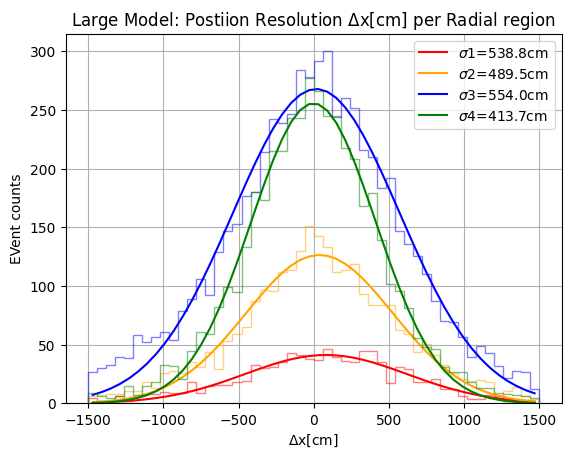

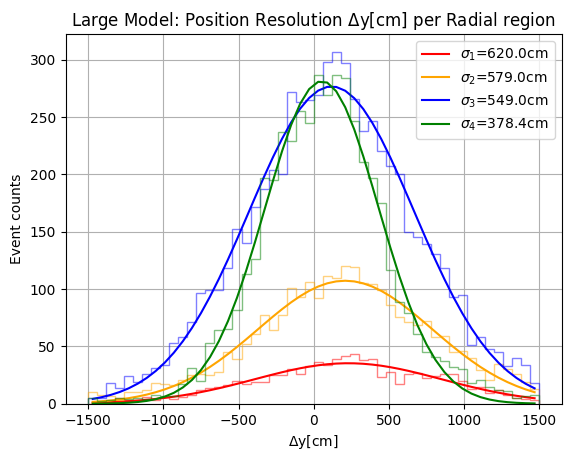

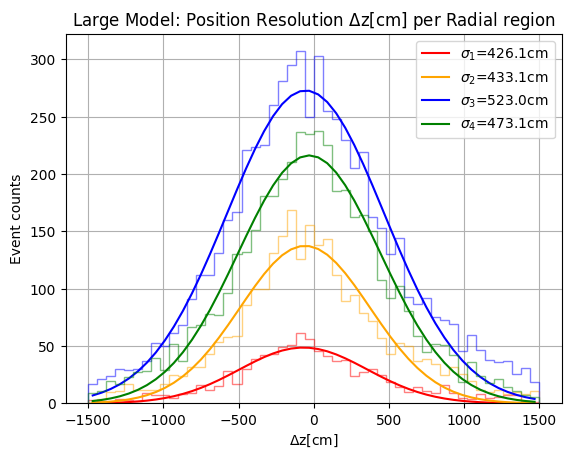

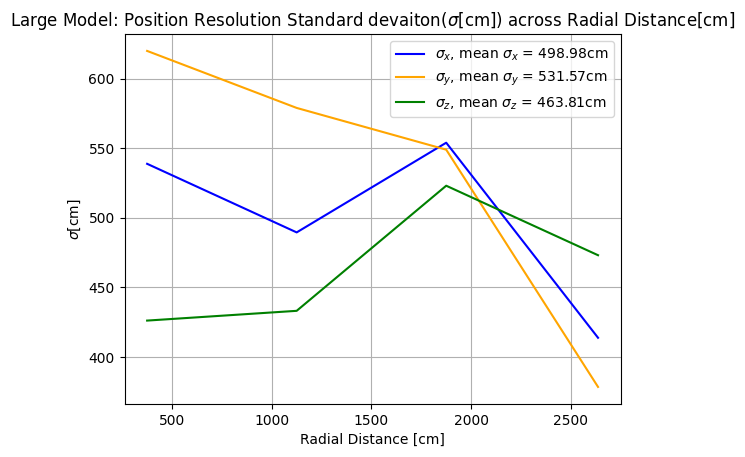

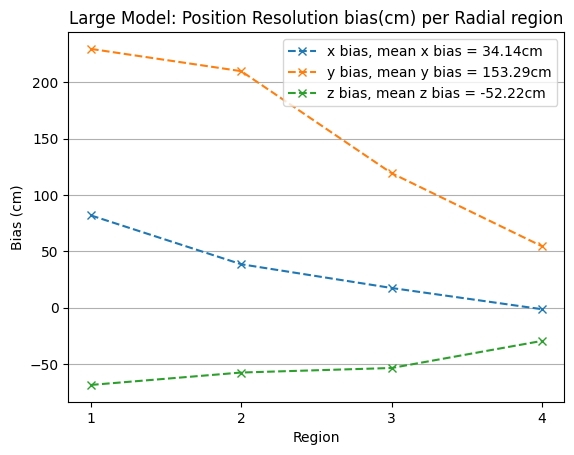

X bias per region: [82. 39. 17. -1.]
Y bias per region: [82. 39. 17. -1.]
Z bias per region: [-68. -57. -53. -29.]
Mean X bias: 34.8006066309592
Mean Y bias: 153.28875727332817
Mean Z bias: 52.218022576099486


In [ ]:
## Radial:
## Returns Radial

r_regions = [(0, 750), (750, 1500), (1500, 2250), (2250, max(rho_target))]

diff = recons_scaled[:,1:]-targets_scaled[:,1:]
xdiff = diff[:,0]
ydiff = diff[:,1]
zdiff = diff[:,2]

Rxbias = []
Rybias = []
Rzbias = []

dx = x_recons - x_target
dy = y_recons - y_target
dz = z_recons - z_target
r = np.sqrt(x_recons**2+y_recons**2)
r_binned_data = []
for r_min, r_max in r_regions:
    mask = (r >= r_min) & (r < r_max)
    r_binned_data.append((dx[mask], dy[mask], dz[mask]))

R = []
sigma_Rx = []

color = ['red', 'orange', 'blue', 'green']
for i, (r_min, r_max) in enumerate(r_regions):
    dx_bin, dy_bin, dz_bin = r_binned_data[i]
    R.append((r_min+r_max)/2)
    hist_delPhi_x = plt.hist(dx_bin, bins = 50, range = [-1500, 1500], alpha = 0.5, histtype='step', lw=2, color = color[i]) #label = 'X error, std = {:.1f} [cm]'.format(dx_bin.std(axis=0))
    x_hist_delPhi_x = (hist_delPhi_x[1][1:]+hist_delPhi_x[1][0:-1])/2
    y_hist_delPhi_x = hist_delPhi_x[0]
    xp0 = [y_hist_delPhi_x.max(), xdiff.mean(), xdiff.std()]
    xp, xpcov = curve_fit(gaussian, x_hist_delPhi_x, y_hist_delPhi_x, p0=xp0)
    xfit = gaussian(x_hist_delPhi_x, xp[0], xp[1], xp[2])
    xlabel=f'$\sigma{i+1}$={np.round(xp[2], 1)}cm'
    sigma_Rx.append(xp[2])
    Rxbias.append(xp[1])
    plt.plot(x_hist_delPhi_x, xfit, label=xlabel, color = color[i])


plt.title(f'Large Model: Postiion Resolution $\Delta$x[cm] per Radial region')
plt.xlabel('$\Delta$x[cm]')
plt.ylabel('EVent counts')
plt.legend()
plt.grid()
plt.show()

R = []

sigma_Ry = []


for i, (r_min, r_max) in enumerate(r_regions):
    dx_bin, dy_bin, dz_bin = r_binned_data[i]
    R.append((phi_min+phi_max)/2)
    hist_delPhi_y = plt.hist(dy_bin, bins = 50, range = [-1500, 1500], alpha = 0.5, histtype='step', lw=2, color = color[i]) # label = 'Y error, std = {:.1f} [cm]'.format(dy_bin.std(axis=0)))
    x_hist_delPhi_y = (hist_delPhi_y[1][1:]+hist_delPhi_y[1][0:-1])/2
    y_hist_delPhi_y = hist_delPhi_y[0]
    yp0 = [y_hist_delPhi_y.max(), ydiff.mean(), ydiff.std()]
    yp, ypcov = curve_fit(gaussian, x_hist_delPhi_y, y_hist_delPhi_y, p0=yp0)
    yfit = gaussian(x_hist_delPhi_y, yp[0], yp[1], yp[2])
    ylabel=f'$\sigma_{i+1}$={np.round(yp[2], 1)}cm'
    sigma_Ry.append(yp[2])
    Rybias.append(yp[1])
    plt.plot(x_hist_delPhi_y, yfit, label=ylabel, color = color[i])
plt.title(f'Large Model: Position Resolution $\Delta$y[cm] per Radial region')
plt.xlabel('$\Delta$y[cm]')
plt.ylabel('Event counts')
plt.legend()
plt.grid()
plt.show()
R = []

sigma_Rz = []
for i, (r_min, r_max) in enumerate(r_regions):
    dx_bin, dy_bin, dz_bin = r_binned_data[i]
    R.append((r_min+r_max)/2)
    hist_delPhi_z = plt.hist(dz_bin, bins = 50, range = [-1500, 1500], alpha = 0.5, histtype='step', lw=2, color = color[i]) #label = 'Z reg{:.1f}, std = {:.1f} [cm]'.format(i, dz_bin.std(axis=0)))
    x_hist_delPhi_z = (hist_delPhi_z[1][1:]+hist_delPhi_z[1][0:-1])/2
    y_hist_delPhi_z = hist_delPhi_z[0]
    zp0 = [y_hist_delPhi_z.max(), zdiff.mean(), zdiff.std()]
    zp, zpcov = curve_fit(gaussian, x_hist_delPhi_z, y_hist_delPhi_z, p0=zp0)
    zfit = gaussian(x_hist_delPhi_z, zp[0], zp[1], zp[2])
    zlabel=f'$\sigma_{i+1}$={np.round(zp[2], 1)}cm'
    sigma_Rz.append(zp[2])
    Rzbias.append(zp[1])
    plt.plot(x_hist_delPhi_z, zfit, label=zlabel, color = color[i])
plt.title(f'Large Model: Position Resolution $\Delta$z[cm] per Radial region')
plt.xlabel('$\Delta$z[cm]')
plt.ylabel('Event counts')
plt.legend()
plt.grid()
plt.show()

sigma_Rx_mean = sum(sigma_Rx) / len(sigma_Rx)


sigma_Ry_mean = sum(sigma_Ry) / len(sigma_Ry)


sigma_Rz_mean = sum(sigma_Rz) / len(sigma_Rz)


plt.plot(R, sigma_Rx, label = f'$\sigma_x$, mean $\sigma_x$ = {sigma_Rx_mean:.2f}cm', color = 'blue')
##plt.plot(R, sigma_Rx_mean, label = 'Mean $\sigma_x$', linestyle = 'dashed', color = 'blue')
plt.plot(R, sigma_Ry, label = f'$\sigma_y$, mean $\sigma_y$ = {sigma_Ry_mean:.2f}cm', color = 'orange')
##plt.plot(R, sigma_Ry_mean, label = 'Mean $\sigma_y$', linestyle = 'dashed', color = 'orange')
plt.plot(R, sigma_Rz, label = f'$\sigma_z$, mean $\sigma_z$ = {sigma_Rz_mean:.2f}cm', color = 'green')
p##lt.plot(R, sigma_Rz_mean, label = 'Mean $\sigma_z$', linestyle = 'dashed', color = 'green')
plt.xlabel('Radial Distance [cm]')
plt.ylabel('$\sigma$[cm]')
plt.title('Large Model: Position Resolution Standard devaiton($\sigma$[cm]) across Radial Distance[cm]')
plt.legend()
plt.grid()
plt.show()



R_regions_graph = [1, 2, 3, 4]

Rxbias_mean = sum(Rxbias) / len(Rxbias)
Rybias_mean = sum(Rybias) / len(Rybias)
Rzbias_mean = sum(Rzbias) / len(Rzbias)

plt.plot(phi_regions_graph, Rxbias, label = f'x bias, mean x bias = {Rxbias_mean:.2f}cm', linestyle = 'dashed', marker = 'x')
plt.plot(phi_regions_graph, Rybias, label = f'y bias, mean y bias = {Rybias_mean:.2f}cm', linestyle = 'dashed', marker = 'x')
plt.plot(phi_regions_graph, Rzbias, label = f'z bias, mean z bias = {Rzbias_mean:.2f}cm', linestyle = 'dashed', marker = 'x')
plt.xticks([1, 2, 3, 4])
plt.xlabel(phi_regions)
plt.xlabel('Region')
plt.ylabel('Bias (cm)')
plt.grid(axis = 'y')
plt.title(f'Large Model: Position Resolution bias(cm) per Radial region')
plt.legend()
plt.show()


#print('R bias per region: {}'.format(np.round(R)))
print('X bias per region: {}'.format(np.round(Rxbias)))
print('Y bias per region: {}'.format(np.round(Rxbias)))
print('Z bias per region: {}'.format(np.round(Rzbias)))

#print('Mean R bias: {}'.format(np.mean(np.abs(R))))
print('Mean X bias: {}'.format(np.mean(np.abs(Rxbias))))
print('Mean Y bias: {}'.format(np.mean(np.abs(Rybias))))
print('Mean Z bias: {}'.format(np.mean(np.abs(Rzbias))))

In [ ]:
def Radial_Reconstructed(recons_scaled, targets_scaled, p_type):
    diff = recons_scaled[:,1:]-targets_scaled[:,1:]
    xdiff = diff[:,0]
    ydiff = diff[:,1]
    zdiff = diff[:,2]
    
    Rxbias = []
    Rybias = []
    Rzbias = []
    
    dx = x_recons - x_target
    dy = y_recons - y_target
    dz = z_recons - z_target
    r = np.sqrt(x_recons**2+y_recons**2)
    r_binned_data = []

    for r_min, r_max in r_regions:
        mask = (r >= r_min) & (r < r_max)
        r_binned_data.append((dx[mask], dy[mask], dz[mask]))
        
    R = []
    sigma_Rx = []
    
    color = ['red', 'orange', 'blue', 'green']
    for i, (r_min, r_max) in enumerate(r_regions):
        dx_bin, dy_bin, dz_bin = r_binned_data[i]
        R.append((r_min+r_max)/2)
        hist_delPhi_x = plt.hist(dx_bin, bins = 50, range = [-1500, 1500], alpha = 0.5, histtype='step', lw=2, color = color[i]) #label = 'X error, std = {:.1f} [cm]'.format(dx_bin.std(axis=0))
        x_hist_delPhi_x = (hist_delPhi_x[1][1:]+hist_delPhi_x[1][0:-1])/2
        y_hist_delPhi_x = hist_delPhi_x[0]
        xp0 = [y_hist_delPhi_x.max(), xdiff.mean(), xdiff.std()]
        xp, xpcov = curve_fit(gaussian, x_hist_delPhi_x, y_hist_delPhi_x, p0=xp0)
        xfit = gaussian(x_hist_delPhi_x, xp[0], xp[1], xp[2])
        xlabel=f'$\sigma{i+1}$={np.round(xp[2], 1)}cm'
        sigma_Rx.append(xp[2])
        Rxbias.append(xp[1])
        plt.plot(x_hist_delPhi_x, xfit, label=xlabel, color = color[i])

    plt.title(f'Base model: {p_type} $\Delta$x[cm] per Radial region')
    plt.xlabel('$\Delta$x[cm]')
    plt.ylabel('Event counts')
    plt.legend()
    plt.grid()
    plt.show()

    R = []

    sigma_Ry = []


    for i, (r_min, r_max) in enumerate(r_regions):
        dx_bin, dy_bin, dz_bin = r_binned_data[i]
        R.append((phi_min+phi_max)/2)
        hist_delPhi_y = plt.hist(dy_bin, bins = 50, range = [-1500, 1500], alpha = 0.5, histtype='step', lw=2, color = color[i]) # label = 'Y error, std = {:.1f} [cm]'.format(dy_bin.std(axis=0)))
        x_hist_delPhi_y = (hist_delPhi_y[1][1:]+hist_delPhi_y[1][0:-1])/2
        y_hist_delPhi_y = hist_delPhi_y[0]
        yp0 = [y_hist_delPhi_y.max(), ydiff.mean(), ydiff.std()]
        yp, ypcov = curve_fit(gaussian, x_hist_delPhi_y, y_hist_delPhi_y, p0=yp0)
        yfit = gaussian(x_hist_delPhi_y, yp[0], yp[1], yp[2])
        ylabel=f'$\sigma_{i+1}$={np.round(yp[2], 1)}cm'
        sigma_Ry.append(yp[2])
        Rybias.append(yp[1])
        plt.plot(x_hist_delPhi_y, yfit, label=ylabel, color = color[i])
    plt.title(f'Base model: {p_type} $\Delta$y[cm] per Radial region')
    plt.xlabel('$\Delta$y[cm]')
    plt.ylabel('Event Counts')
    plt.legend()
    plt.grid()
    plt.show()
    R = []

    sigma_Rz = []
    for i, (r_min, r_max) in enumerate(r_regions):
        dx_bin, dy_bin, dz_bin = r_binned_data[i]
        R.append((r_min+r_max)/2)
        hist_delPhi_z = plt.hist(dz_bin, bins = 50, range = [-1500, 1500], alpha = 0.5, histtype='step', lw=2, color = color[i]) #label = 'Z reg{:.1f}, std = {:.1f} [cm]'.format(i, dz_bin.std(axis=0)))
        x_hist_delPhi_z = (hist_delPhi_z[1][1:]+hist_delPhi_z[1][0:-1])/2
        y_hist_delPhi_z = hist_delPhi_z[0]
        zp0 = [y_hist_delPhi_z.max(), zdiff.mean(), zdiff.std()]
        zp, zpcov = curve_fit(gaussian, x_hist_delPhi_z, y_hist_delPhi_z, p0=zp0)
        zfit = gaussian(x_hist_delPhi_z, zp[0], zp[1], zp[2])
        zlabel=f'$\sigma_{i+1}$={np.round(zp[2], 1)}cm'
        sigma_Rz.append(zp[2])
        Rzbias.append(zp[1])
        plt.plot(x_hist_delPhi_z, zfit, label=zlabel, color = color[i])
    plt.title(f'Base model: {p_type} $\Delta$z[cm] per Radial region')
    plt.xlabel('$\Delta$z[cm]')
    plt.ylabel('Event Counts')
    plt.legend()
    plt.grid()
    plt.show()
    
    sigma_Rx_mean = sum(sigma_Rx) / len(sigma_Rx)

    sigma_Ry_mean = sum(sigma_Ry) / len(sigma_Ry)

    sigma_Rz_mean = sum(sigma_Rz) / len(sigma_Rz)
    

    plt.plot(R, sigma_Rx, label = f'$\sigma_x$, {sigma_Rx_mean:.2f}cm', color = 'blue')
##plt.plot(R, sigma_Rx_mean, label = 'Mean $\sigma_x$', linestyle = 'dashed', color = 'blue')
    plt.plot(R, sigma_Ry, label = f'$\sigma_y$, {sigma_Ry_mean:.2f}cm', color = 'orange')
##plt.plot(R, sigma_Ry_mean, label = 'Mean $\sigma_y$', linestyle = 'dashed', color = 'orange')
    plt.plot(R, sigma_Rz, label = f'$\sigma_z$, {sigma_Rz_mean:.2f}cm', color = 'green')
##plt.plot(R, sigma_Rz_mean, label = 'Mean $\sigma_z$', linestyle = 'dashed', color = 'green')
    plt.xlabel(' Radial distance R [cm]')
    plt.ylabel('Standard Deviation $\sigma$ [cm]')
    plt.title(f'Base model: {p_type} Standard Deviation($\sigma$[cm]) across Raidal distance[cm]')
    plt.legend()
    plt.grid()
    plt.show()



    R_regions_graph = [1, 2, 3, 4]

    Rxbias_mean = sum(Rxbias) / len(Rxbias)
    Rybias_mean = sum(Rybias) / len(Rybias)
    Rzbias_mean = sum(Rzbias) / len(Rzbias)

    plt.plot(R_regions_graph, Rxbias, label = f'x bias, mean = {Rxbias_mean:.2f}cm', linestyle = 'dashed', marker = 'x')
    plt.plot(R_regions_graph, Rybias, label = f'y bias, mean = {Rybias_mean:.2f}cm', linestyle = 'dashed', marker = 'x')
    plt.plot(R_regions_graph, Rzbias, label = f'z bias, mean = {Rzbias_mean:.2f}cm', linestyle = 'dashed', marker = 'x')
    plt.xticks([1, 2, 3, 4])
    plt.xlabel(phi_regions)
    plt.xlabel('Region')
    plt.ylabel('Bias (cm)')
    plt.grid(axis = 'y')
    plt.title(f'Base model: {p_type} Bias (cm) per R region')
    plt.legend()
    plt.show()


#print('R bias per region: {}'.format(np.round(R)))
    print('X bias per region: {}'.format(np.round(Rxbias)))
    print('Y bias per region: {}'.format(np.round(Rxbias)))
    print('Z bias per region: {}'.format(np.round(Rzbias)))

#print('Mean R bias: {}'.format(np.mean(np.abs(R))))
    print('Mean X bias: {}'.format(np.mean(np.abs(Rxbias))))
    print('Mean Y bias: {}'.format(np.mean(np.abs(Rybias))))
    print('Mean Z bias: {}'.format(np.mean(np.abs(Rzbias))))


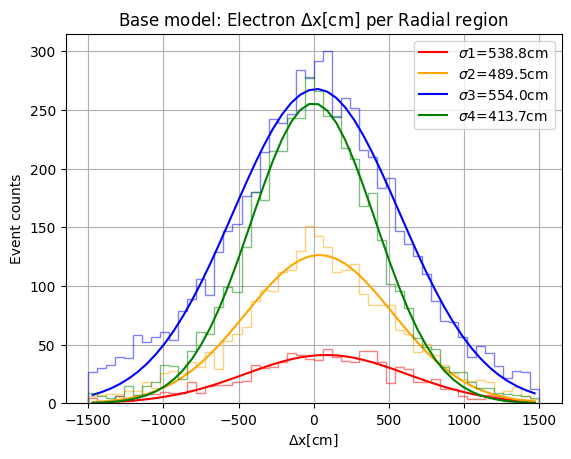

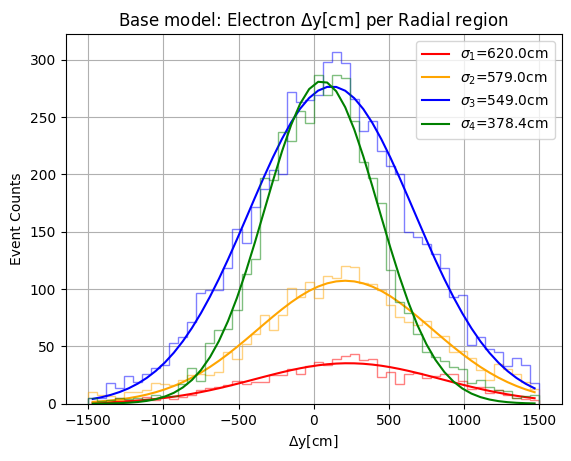

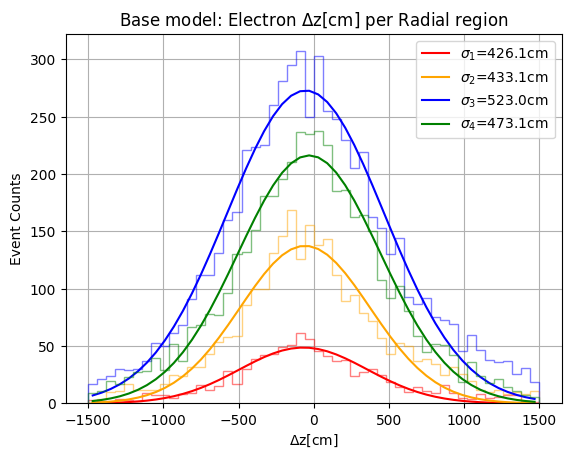

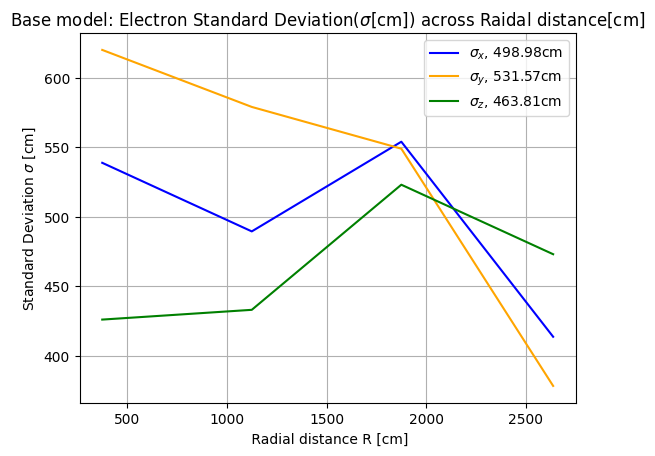

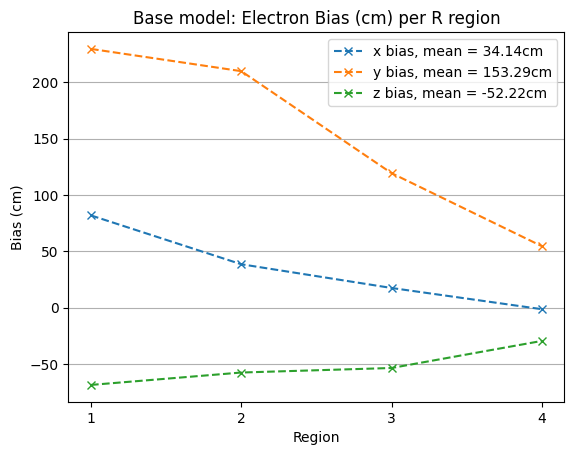

X bias per region: [82. 39. 17. -1.]
Y bias per region: [82. 39. 17. -1.]
Z bias per region: [-68. -57. -53. -29.]
Mean X bias: 34.80056669007895
Mean Y bias: 153.28869826785638
Mean Z bias: 52.21805000627433


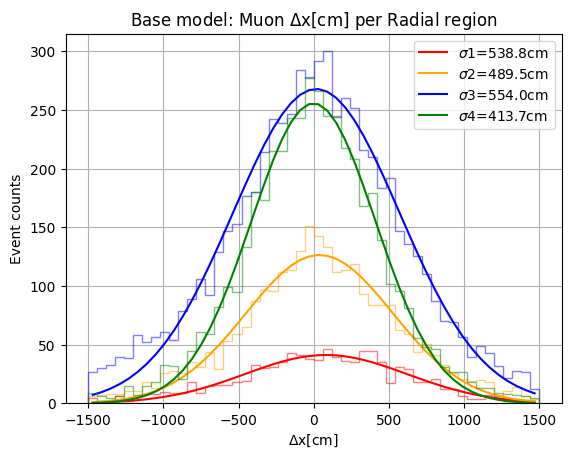

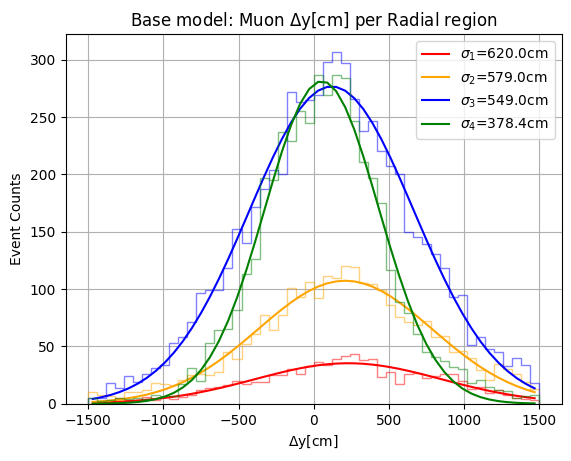

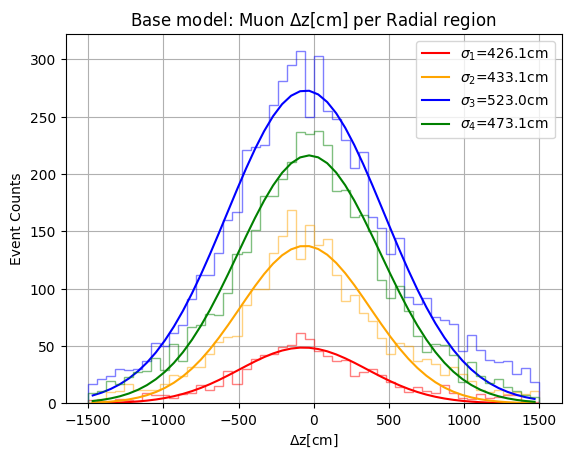

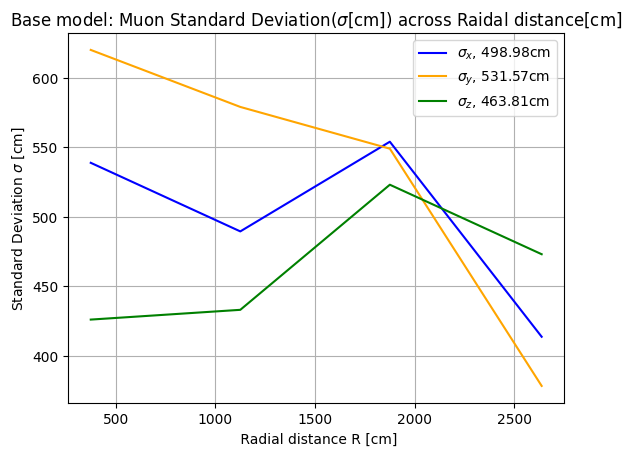

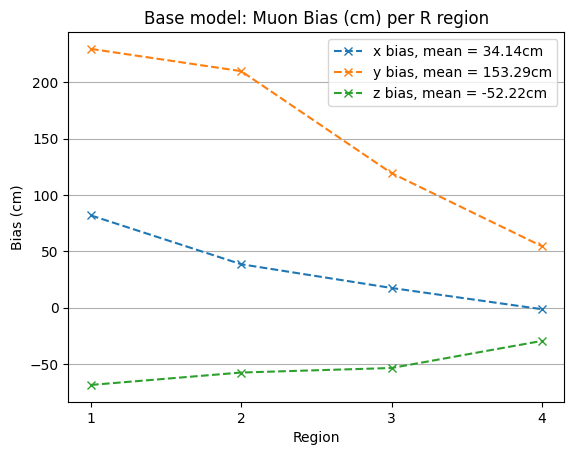

X bias per region: [82. 39. 17. -1.]
Y bias per region: [82. 39. 17. -1.]
Z bias per region: [-68. -57. -53. -29.]
Mean X bias: 34.800591528123995
Mean Y bias: 153.28878260123162
Mean Z bias: 52.21802671897245


In [ ]:
Radial_Reconstructed(erecons_scaled, etargets_scaled, eparticle)
Radial_Reconstructed(mrecons_scaled, mtargets_scaled, mparticle)

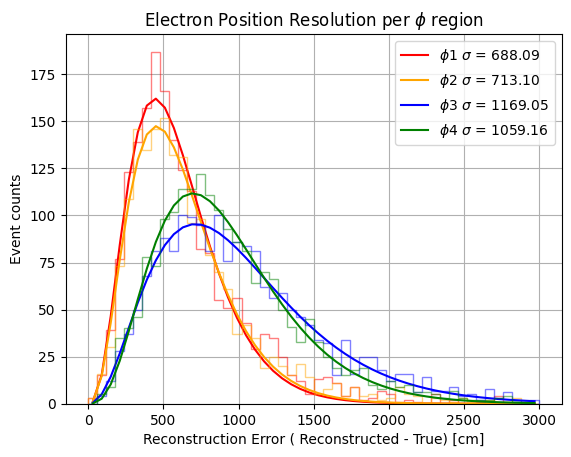

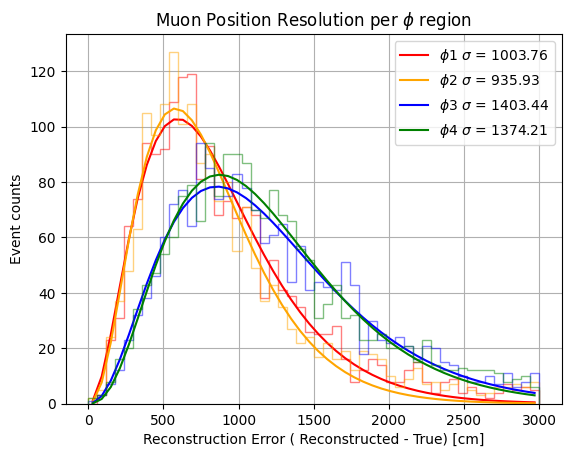

In [ ]:
from scipy.stats import gamma
def find_sigma(shape, scale, sigma_fraction = 0.68):
    x_sigma = gamma.ppf(sigma_fraction, a = shape, scale = scale)
    return x_sigma

def fit_function(x, shape, scale, amplitude):
    return amplitude*gamma.pdf(x, a=shape, scale=scale)

def posresparticle(recons_scaled, targets_scaled, particle):
    distance = np.sqrt((recons_scaled[:,1]-targets_scaled[:,1])**2 + (recons_scaled[:,2]-targets_scaled[:,2])**2 +(recons_scaled[:,3] - targets_scaled[:,3])**2)


    phi = np.arctan2(targets_scaled[:,2], targets_scaled[:,1])
    phi_binned_data = []
    phi_regions = [(-np.pi, -np.pi/2), (-np.pi/2, 0), (0, np.pi/2), (np.pi/2, np.pi)]
    for phi_min, phi_max in phi_regions:
        mask  = (phi >= phi_min) & (phi < phi_max)
        phi_binned_data.append((distance[mask]))

    PHI = []
    sigma_Phix = []
    Phi_bias = []
    color = ['red', 'orange', 'blue', 'green']
    for i, (phi_min, phi_max) in enumerate(phi_regions):
        dis_bin = phi_binned_data[i]
        PHI.append((phi_min+phi_max)/2)
        hist, bin_edges = np.histogram(dis_bin, bins=50, range = [0,3000])
        bin_centers = (bin_edges[:-1]+ bin_edges[1:])/2


        try:
            p_opt, _ = curve_fit(fit_function, bin_centers, hist, p0 = [2, 500, hist.max()])
            shape, scale, amplitude = p_opt  
            fitted_curve = fit_function(bin_centers, shape, scale, amplitude)
        except RuntimeError as e:
            print(f"Fit failed for region {1+e}:{e}")
            fitted_curve = np.zeros_like(hist)

        sigma = find_sigma(shape, scale)
        plt.hist(dis_bin, bins = 50, range = [0, 3000], alpha = 0.5, histtype='step', lw=2, color = color[i])
        plt.plot(bin_centers, fitted_curve, label = f'$\phi${i+1} $\sigma$ = {sigma:.2f}', color = color[i])

    plt.title(f'{particle} Position Resolution per $\phi$ region')
    plt.xlabel('Reconstruction Error ( Reconstructed - True) [cm]')
    plt.ylabel('Event counts')
    plt.legend()
    plt.grid()
    plt.show()

eparticle = 'Electron'
mparticle = 'Muon'
erecons_scaled, mrecons_scaled = recons_scaled[eevents], recons_scaled[mevents]
etargets_scaled, mtargets_scaled = targets_scaled[eevents], targets_scaled[mevents]

posresparticle(erecons_scaled, etargets_scaled, eparticle)
posresparticle(mrecons_scaled, mtargets_scaled, mparticle)   
    

In [ ]:
def particle500MeVRes(recons_scaled, targets_scaled, particle):
    for j in range(len(targets_scaled[:,0])):
        if np.round(targets_scaled[j,0]) == 500:
            index = j
            break
            
    print(f'Energy of event: {targets_scaled[index, 0]:.2f} Mev. Index: {index}')
    Ediff = ((recons_scaled[index, 0]-targets_scaled[index, 0])/targets_scaled[index,0]) * 100
    Xdiff = recons_scaled[index,0] - targets_scaled[index,0]
    Ydiff = recons_scaled[index,1] - targets_scaled[index,1]
    Zdiff = recons_scaled[index,2] - targets_scaled[index,1]
    Rdiff = np.sqrt(Xdiff**2 + Ydiff**2 + Zdiff**2)

    print(f'{particle} Energy resolution: {Ediff:.2f}%')
    print(f'{particle} X resolution: {Xdiff:.2f} cm')
    print(f'{particle} Y resolution: {Ydiff:.2f} cm')
    print(f'{particle} Z resolution: {Zdiff:.2f} cm')
    print(f'{particle} Total position resolution: {Rdiff:.2f} cm')


eparticle = 'Electron'
mparticle = 'Muon'
erecons_scaled, mrecons_scaled = recons_scaled[eevents], recons_scaled[mevents]
etargets_scaled, mtargets_scaled = targets_scaled[eevents], targets_scaled[mevents]

particle500MeVRes(erecons_scaled, etargets_scaled, eparticle)
particle500MeVRes(mrecons_scaled, mtargets_scaled, mparticle)

Energy of event: 500.27 Mev. Index: 763
Electron Energy resolution: -17.45%
Electron X resolution: -87.29 cm
Electron Y resolution: 110.89 cm
Electron Z resolution: 149.67 cm
Electron Total position resolution: 205.71 cm
Energy of event: 500.31 Mev. Index: 94
Muon Energy resolution: 15.47%
Muon X resolution: 77.38 cm
Muon Y resolution: -48.22 cm
Muon Z resolution: -945.84 cm
Muon Total position resolution: 950.22 cm


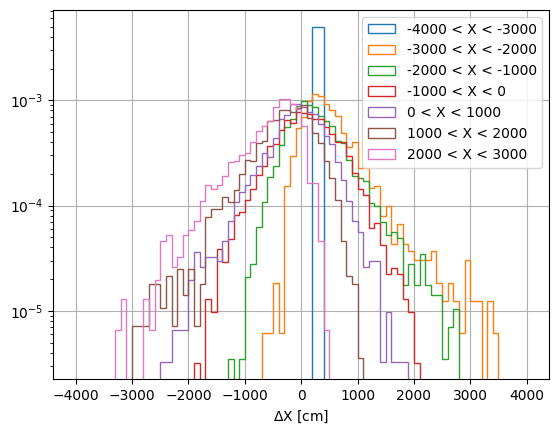

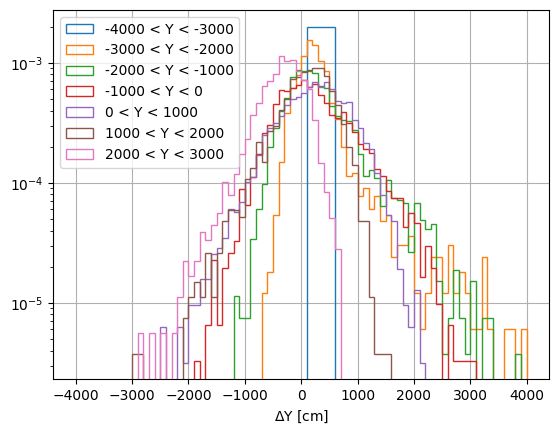

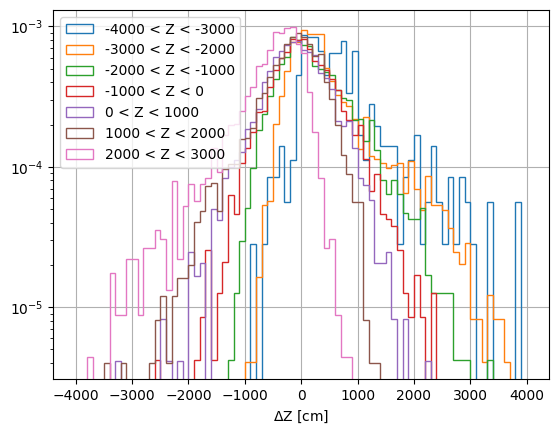

In [ ]:
## ANALYSE PERFORMANCE IN CYLINDERICAL COORIDNATES


distance_x_binned=binning(targets_scaled[:,1], distance[:,0], bin_width=1000, bin_range=[-4000,4000])
for i in range(len(distance_x_binned)-1):
    lower=-4000+1000*i
    higher=-4000+1000*(i+1)
    label='{:d} < X < {:d}'.format(lower,higher)
    plt.hist(distance_x_binned[i], bins=80, range=[-4000,4000], label=label , histtype='step', lw=2, density=True)
plt.grid()
plt.yscale('log')
plt.legend()
plt.xlabel(r'$\Delta$X [cm]')
plt.show()

distance_y_binned=binning(targets_scaled[:,2], distance[:,1], bin_width=1000, bin_range=[-4000,4000])
for i in range(len(distance_x_binned)-1):
    lower=-4000+1000*i
    higher=-4000+1000*(i+1)
    label='{:d} < Y < {:d}'.format(lower,higher)
    plt.hist(distance_y_binned[i], bins=80, range=[-4000,4000], label=label , histtype='step', lw=2, density=True)
plt.grid()
plt.yscale('log')
plt.legend()
plt.xlabel(r'$\Delta$Y [cm]')
plt.show()

distance_z_binned=binning(targets_scaled[:,3], distance[:,2], bin_width=1000, bin_range=[-4000,4000])
for i in range(len(distance_z_binned)-1):
    lower=-4000+1000*i
    higher=-4000+1000*(i+1)
    label='{:d} < Z < {:d}'.format(lower,higher)
    plt.hist(distance_z_binned[i], bins=80, range=[-4000,4000], label=label , histtype='step', lw=2, density=True)
plt.grid()
plt.yscale('log')
plt.legend()
plt.xlabel(r'$\Delta$Z [cm]')
plt.show()